In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from matplotlib.ticker import LogFormatterExponent

ZF_ALL = np.load('fits/ZFOURGE_TOTAL.npz', allow_pickle=True)
# ZF_SF = np.load('fits/ZFOURGE_SF.npz', allow_pickle=True)
# ZF_QUI = np.load('fits/ZFOURGE_QUI.npz', allow_pickle=True)

CG_ALL = np.load('fits/CIGALE_TOTAL.npz', allow_pickle=True)
CG_SF = np.load('fits/CIGALE_SF.npz', allow_pickle=True)
CG_AGN = np.load('fits/CIGALE_AGN.npz', allow_pickle=True)

print(ZF_ALL['s'])
print(CG_AGN['s'])
print(CG_SF['s'])

print(ZF_ALL['z'].tolist())

# export = True
export = False

[1.1 1.0 0.9 0.8 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7]
[1.0 0.7 0.7 1.0 1.0 1.0 1.0 1.0 0.9 0.8 0.7 0.6]
[0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7]
[[0.0, 0.3], [0.3, 0.45], [0.45, 0.6], [0.6, 0.8], [0.8, 1.0], [1.0, 1.2], [1.2, 1.7], [1.7, 2.0], [2.0, 2.5], [2.5, 3.0], [3.0, 4.2], [4.2, 6.0]]


# ZFOURGE Luminosity Function & Comparison

[1.1 1.0 0.9 0.8 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7]


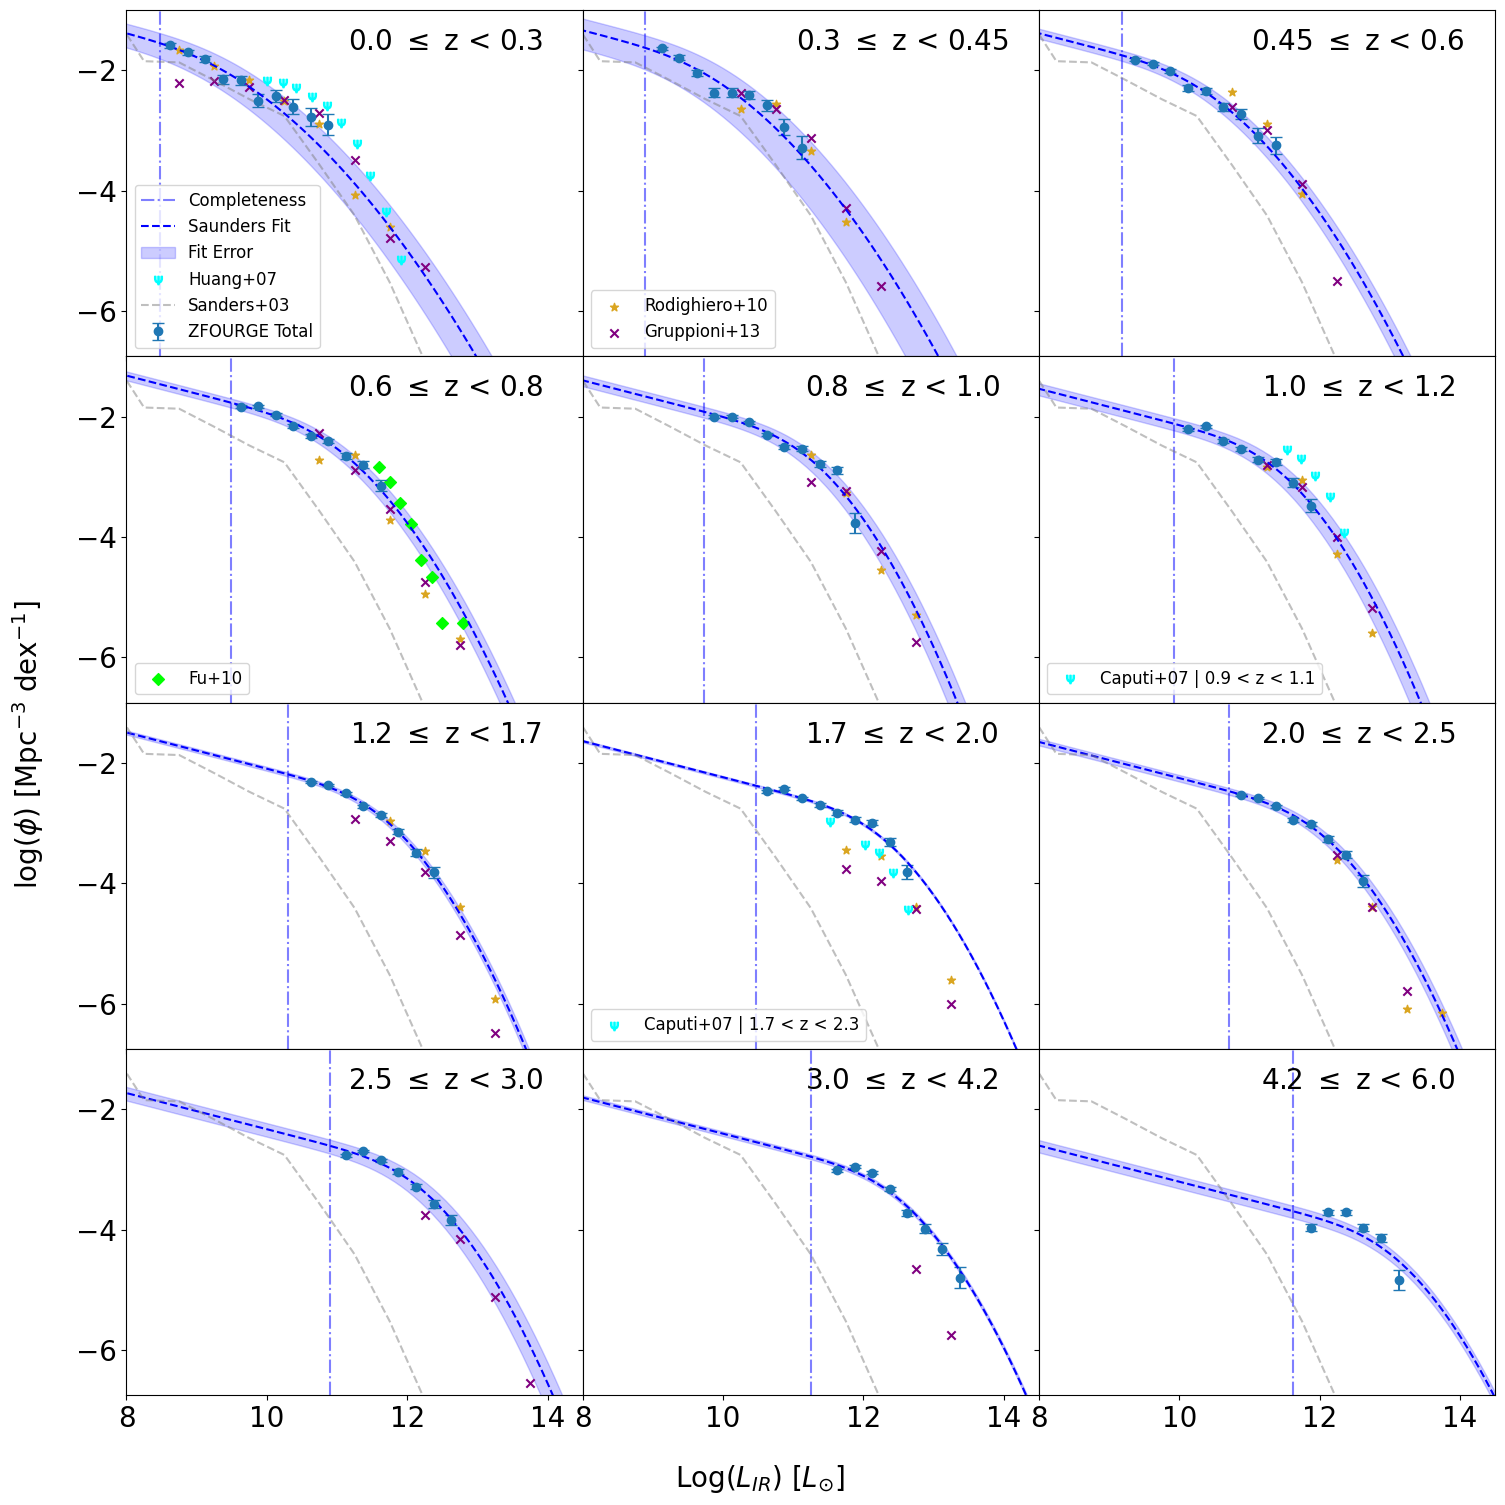

In [2]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15), sharex=True, sharey=True)
axes = axes.flatten()
print(ZF_ALL['s'])

# ZFOURGE Saunders Function
def saunders_luminosity(L, L_star, phi_star, sigma):
    return phi_star * (L / L_star) ** (1-1.3) * np.exp(-1 / (2 * sigma ** 2) * (np.log10(1 + (L / L_star)))**2)

# ZFOURGE TOTAL
for i, (ax, l, p, e, params, perr, (z_start, z_end), min_l, sigma) in enumerate(zip(axes, ZF_ALL['x'], ZF_ALL['y'], ZF_ALL['e'], ZF_ALL['saunder_p'], ZF_ALL['saunder_e'], ZF_ALL['z'], ZF_ALL['m'], ZF_ALL['s'])):

    # Phi values
    yerr = np.array(e) / (np.array(p) * np.log(10))    
    ax.errorbar(l, np.log10(p), yerr=yerr, ls='none', marker='o', capsize=4, label='ZFOURGE Total' if i == 0 else '', color='C0')
    ax.axvline(np.log10(min_l/(3.83*10**26)), color='blue', linestyle='-.', alpha=0.5, label='Completeness' if i == 0 else "")
    ax.set_title(f'{z_start} $\leq$ z < {z_end}', y=0.86, x=0.7, fontsize=20)
    ax.set_xticks([8,10,12,14])
    ax.set_yticks([-6,-4,-2])
    ax.tick_params(axis='both', labelsize=20)
    ax.set_xlim(8, 14.5)
    ax.set_ylim(-6.75, -1)

    # Saunders Fit
    l = np.logspace(6, 15, 100)
    ax.plot(np.log10(l), np.log10(saunders_luminosity(l, *params, sigma)), label='Saunders Fit' if i == 0 else "", color='blue', linestyle='--')
    p_up = params + perr
    p_down = np.abs(params - perr)
    ax.fill_between(np.log10(l), 
        np.log10(saunders_luminosity(l, *p_down, sigma)), 
        np.log10(saunders_luminosity(l, *p_up, sigma)), 
        color='blue', alpha=0.2, label='Fit Error' if i == 0 else "")

# Rodighiero 
R_L_03 = [8.75, 9.25, 9.75, 10.25, 10.75, 11.25, 11.75] # 0 < z < 0.3
R_L_04 =                   [10.25, 10.75, 11.25, 11.75] # 0.3 < z < 0.45
R_L_06 =                          [10.75, 11.25, 11.75] # 0.45 < z < 0.6
R_L_08 =                          [10.75, 11.25, 11.75, 12.25, 12.75] # 0.6 < z < 0.8
R_L_10 =                                 [11.25, 11.75, 12.25, 12.75] # 0.8 < z < 1.0
R_L_12 =                                 [11.25, 11.75, 12.25, 12.75] # 1.0 < z < 1.2
R_L_17 =                                        [11.75, 12.25, 12.75, 13.25] # 1.2 < z < 1.7
R_L_20 =                                        [11.75, 12.25, 12.75, 13.25] # 1.7 < z < 2
R_L_25 =                                               [12.25, 12.75, 13.25, 13.75] # 2 < z < 2.5
R_L = [R_L_03, R_L_04, R_L_06, R_L_08, R_L_10, R_L_12, R_L_17, R_L_20, R_L_25]

R_P_03 = [-1.67, -1.93, -2.17, -2.51, -2.90, -4.07, -4.61] # 0 < z < 0.3
R_P_04 =                      [-2.65, -2.56, -3.34, -4.52] # 0.3 < z < 0.45
R_P_06 =                             [-2.36, -2.89, -4.05] # 0.45 < z < 0.6
R_P_08 =                             [-2.72, -2.64, -3.72, -4.94, -5.7] # 0.6 < z < 0.8
R_P_10 =                                    [-2.64, -3.27, -4.54, -5.3] # 0.8 < z < 1.0
R_P_12 =                                    [-2.83, -3.05, -4.28, -5.6] # 1.0 < z < 1.2
R_P_17 =                                           [-2.97, -3.46, -4.4, -5.92] # 1.2 < z < 1.7
R_P_20 =                                           [-3.45, -3.54, -4.4, -5.61] # 1.7 < z < 2
R_P_25 =                                                  [-3.61, -4.4, -6.09, -6.15] # 2 < z < 2.5
R_P = [R_P_03, R_P_04, R_P_06, R_P_08, R_P_10, R_P_12, R_P_17, R_P_20, R_P_25]

# Gruppioni
G_L_03 = [8.75, 9.25, 9.75, 10.25, 10.75, 11.25, 11.75, 12.25] # 0.0 < z < 0.3
G_L_04 =                   [10.25, 10.75, 11.25, 11.75, 12.25] # 0.3 < z < 0.45
G_L_06 =                          [10.75, 11.25, 11.75, 12.25] # 0.45 < z < 0.6
G_L_08 =                          [10.75, 11.25, 11.75, 12.25, 12.75] # 0.6 < z < 0.8
G_L_10 =                                 [11.25, 11.75, 12.25, 12.75] # 0.8 < z < 1.0
G_L_12 =                                 [11.25, 11.75, 12.25, 12.75] # 1.0 < z < 1.2
G_L_17 =                                 [11.25, 11.75, 12.25, 12.75, 13.25] # 1.2 < z < 1.7
G_L_20 =                                        [11.75, 12.25, 12.75, 13.25] # 1.7 < z < 2
G_L_25 =                                               [12.25, 12.75, 13.25] # 2 < z < 2.5
G_L_30 =                                               [12.25, 12.75, 13.25, 13.75] # 2.5 < z < 3
G_L_42 =                                                      [12.75, 13.25, 13.75] # 3 < z < 4.2
G_L = [G_L_03, G_L_04, G_L_06, G_L_08, G_L_10, G_L_12, G_L_17, G_L_20, G_L_25, G_L_30, G_L_42]

G_P_03 = [-2.21, -2.18, -2.28, -2.50, -2.71, -3.49, -4.79, -5.27] # 0.0 < z < 0.3
G_P_04 =                      [-2.37, -2.64, -3.12, -4.29, -5.58] # 0.3 < z < 0.45
G_P_06 =                             [-2.61, -2.99, -3.89, -5.50] # 0.45 < z < 0.6
G_P_08 =                             [-2.27, -2.89, -3.53, -4.75, -5.79] # 0.6 < z < 0.8    
G_P_10 =                                    [-3.09, -3.24, -4.23, -5.74] # 0.8 < z < 1.0
G_P_12 =                                    [-2.80, -3.17, -4.00, -5.18] # 1.0 < z < 1.2
G_P_17 =                                    [-2.93, -3.29, -3.81, -4.85, -6.48] # 1.2 < z < 1.7
G_P_20 =                                           [-3.76, -3.96, -4.42, -6.01] # 1.7 < z < 2
G_P_25 =                                                  [-3.53, -4.40, -5.79] # 2 < z < 2.5
G_P_30 =                                                  [-3.75, -4.15, -5.11, -6.54] # 2.5 < z < 3
G_P_42 =                                                         [-4.65, -5.75, -7.18] # 3 < z < 4.2
G_P = [G_P_03, G_P_04, G_P_06, G_P_08, G_P_10, G_P_12, G_P_17, G_P_20, G_P_25, G_P_30, G_P_42]

# Rodighiero
for i, (ax, lum, phi) in enumerate(zip(axes, R_L, R_P)):
    ax.scatter(lum, phi, color='goldenrod', marker='*', label='Rodighiero+10' if i == 1 else '')
    
# Gruppioni
for i, (ax, lum, phi) in enumerate(zip(axes, G_L, G_P)):
    ax.scatter(lum, phi, color='purple', marker='x', label='Gruppioni+13' if i == 1 else '')

# Fu 0.6 < z < 0.8
axes[3].scatter(x=[11.60, 11.75, 11.90, 12.05, 12.20, 12.35, 12.50, 12.80], y=[-2.83, -3.08, -3.44, -3.78, -4.38, -4.66, -5.43, -5.43], label='Fu+10', marker='D', color='lime')

# Caputi 0.9 < z < 1.1
axes[5].scatter(x=[12.35, 12.15, 11.94, 11.74, 11.54], y=[-3.93, -3.33, -2.99, -2.71, -2.56], label='Caputi+07 | 0.9 < z < 1.1', marker='$\Psi$', color='cyan')

# Caputi 1.7 < z < 2.3
axes[7].scatter(x=[12.63, 12.42, 12.22, 12.02, 11.53], y=[-4.45, -3.83, -3.50, -3.36, -2.98], label='Caputi+07 | 1.7 < z < 2.3', marker='$\Psi$', color='cyan')

# Huang 0.0 < z < 0.3
axes[0].scatter(x=[11.91, 11.70, 11.47, 11.28, 11.06, 10.85, 10.64, 10.42, 10.23, 10.00], y=[-5.15, -4.36, -3.75, -3.22, -2.88, -2.59, -2.45, -2.29, -2.21, -2.18],
                label='Huang+07', marker='$\Psi$', color='cyan')

# Sanders local
sanders_local_l = [7.75, 8.25, 8.75, 9.25, 9.75, 10.25, 10.75, 11.25, 11.75, 12.25]
sanders_local_p = [-0.95, -1.85, -1.87, -2.17, -2.48, -2.76, -3.57, -4.41, -5.52, -6.83]
for i, ax in enumerate(axes):
    ax.plot(sanders_local_l, sanders_local_p, label=f'Sanders+03' if i == 0 else '', color='grey', linestyle='--', alpha=0.5)
    
axes[0].legend(loc='lower left', fontsize=12)
axes[1].legend(loc='lower left', fontsize=12)
axes[3].legend(loc='lower left', fontsize=12)
axes[5].legend(loc='lower left', fontsize=12)
axes[7].legend(loc='lower left', fontsize=12)
fig.supxlabel('Log($L_{IR}$) [$L_{\odot}$]', y=0, fontsize=20)
fig.supylabel('log($\phi$) [Mpc$^{-3}$ dex$^{-1}$]', x=0, fontsize=20)
plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

# CIGALE Decomposed Comparison

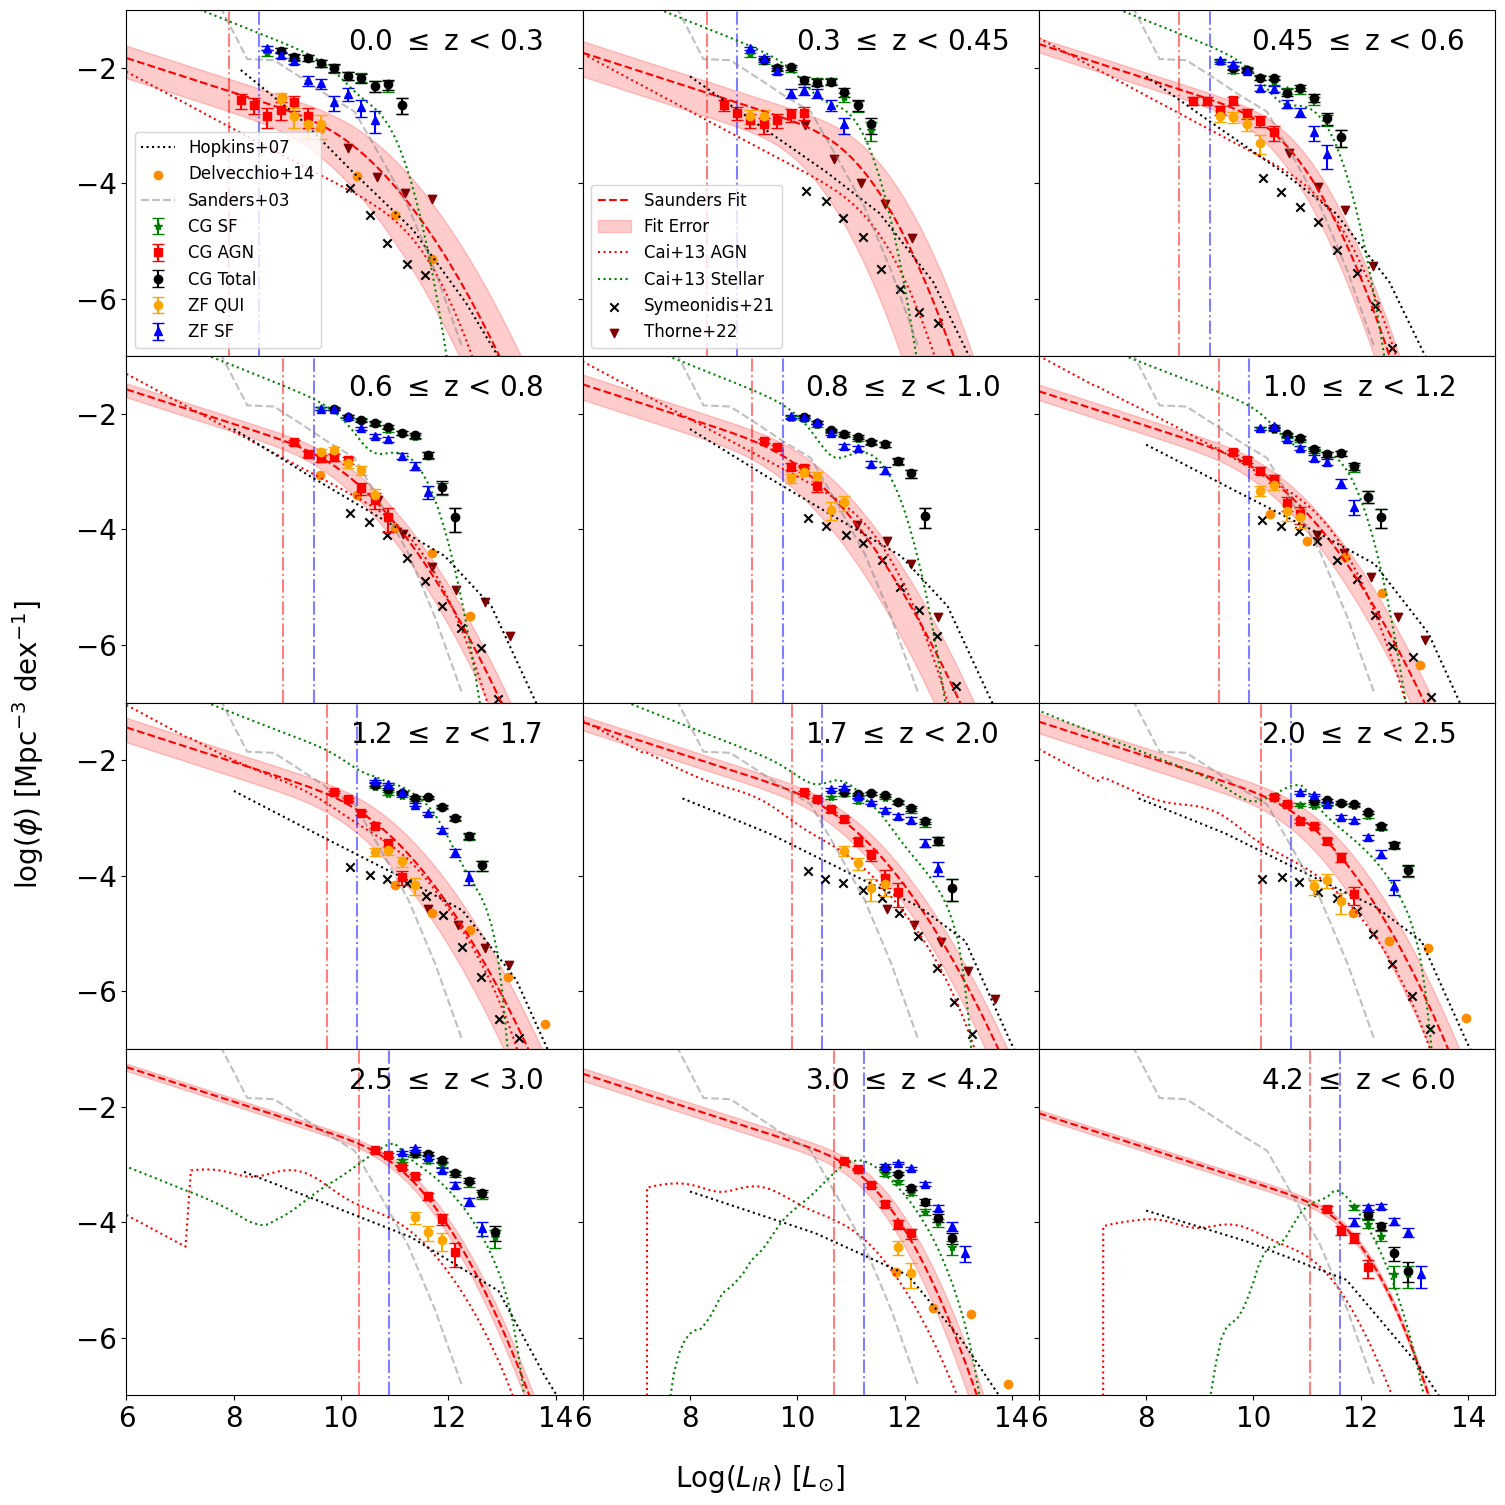

In [3]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15), sharex=True, sharey=True)
axes = axes.flatten()

def schechter_luminosity(L, L_star, phi_star):
    return phi_star * (L / L_star) ** (1-1.2) * np.exp(-L / L_star)

""" CIGALE SF """
for i, (ax, l, p, e, (z_start, z_end)) in enumerate(zip(axes, CG_SF['x'], CG_SF['y'], CG_SF['e'], CG_SF['z'])):
    yerr = [np.log10(p) - np.log10(p - e), np.log10(p + e) - np.log10(p)]
    ax.errorbar(l, np.log10(p), yerr=yerr, ls='none', marker='*', capsize=4, label='CG SF' if i == 0 else '', color='green')
    ax.set_title(f'{z_start} $\leq$ z < {z_end}', y=0.86, x=0.7, fontsize=20)
    ax.set_xticks([6,8,10,12,14])
    ax.set_yticks([-6,-4,-2])
    ax.tick_params(axis='both', labelsize=20)
    ax.set_xlim(6, 14.5)
    ax.set_ylim(-7, -1)

""" CIGALE AGN """
for i, (ax, l, p, e, min_l) in enumerate(zip(axes, CG_AGN['x'], CG_AGN['y'], CG_AGN['e'], CG_AGN['m'])):
    yerr = [np.log10(p) - np.log10(p - e), np.log10(p + e) - np.log10(p)]
    ax.errorbar(l, np.log10(p), yerr=yerr, ls='none', marker='s', capsize=4, label='CG AGN' if i == 0 else '', color='red')
    ax.axvline(np.log10(min_l/(3.83*10**26)), color='red', linestyle='-.', alpha=0.5, label='CIGALE AGN Completeness' if i == -1 else "")

""" CIGALE TOTAL """
for i, (ax, l, p, e, (z_start, z_end)) in enumerate(zip(axes, CG_ALL['x'], CG_ALL['y'], CG_ALL['e'], CG_ALL['z'])):
    yerr = [np.log10(p) - np.log10(p - e), np.log10(p + e) - np.log10(p)]
    ax.errorbar(l, np.log10(p), yerr=yerr, ls='none', marker='o', capsize=4, label='CG Total' if i == 0 else '', color='black')

""" ZFOURGE Quiescent """
for i, (ax, l, p, e, (z_start, z_end), min_l) in enumerate(zip(axes, ZF_QUI['x'], ZF_QUI['y'], ZF_QUI['e'], ZF_QUI['z'], ZF_QUI['m'])):
    try:
        yerr = [np.log10(p) - np.log10(p - e), np.log10(p + e) - np.log10(p)]
    except TypeError:
        continue
    ax.errorbar(l, np.log10(p), yerr=yerr, ls='none', marker='o', capsize=4, label='ZF QUI' if i == 0 else '', color='orange')

""" ZFOURGE Star Forming """
for i, (ax, l, p, e, (z_start, z_end), min_l) in enumerate(zip(axes, ZF_SF['x'], ZF_SF['y'], ZF_SF['e'], ZF_SF['z'], ZF_SF['m'])):
    yerr = [np.log10(p) - np.log10(p - e), np.log10(p + e) - np.log10(p)]
    ax.errorbar(l, np.log10(p), yerr=yerr, ls='none', marker='^', capsize=4, label='ZF SF' if i == 0 else '', color='blue')
    ax.axvline(np.log10(min_l/(3.83*10**26)), color='blue', linestyle='-.', alpha=0.5, label='ZFOURGE Completeness' if i == -1 else "")
    
""" CIGALE SF Saunders Fit """
# for i, (ax, p, perr) in enumerate(zip(axes, CG_SF['saunder_p'], CG_SF['saunder_e'])):
#     l = np.logspace(6, 15, 100)
#     ax.plot(np.log10(l), np.log10(saunders_luminosity(l, *p)), label='Schechter Fit' if i == 1 else "", color='green', linestyle='--')
#     ax.fill_between(np.log10(l), 
#         np.log10(saunders_luminosity(l, *np.abs(p - perr))), 
#         np.log10(saunders_luminosity(l, *(p + perr))), 
#         color='green', alpha=0.2, label='Fit Error' if i == 1 else "")

""" CIGALE SF Schechter Fit """
# for i, (ax, p, perr) in enumerate(zip(axes, CG_SF['schech_p'], CG_SF['schech_e'])):
#     l = np.logspace(6, 15, 100)
#     ax.plot(np.log10(l), np.log10(schechter_luminosity(l, *p)), label='Schechter Fit' if i == 1 else "", color='lime', linestyle='--')
#     ax.fill_between(np.log10(l), 
#         np.log10(schechter_luminosity(l, *np.abs(p - perr))), 
#         np.log10(schechter_luminosity(l, *(p + perr))), 
#         color='lime', alpha=0.2, label='Fit Error' if i == 1 else "")
    
""" CIGALE AGN Schechter Fit """
# for i, (ax, p, perr) in enumerate(zip(axes, CG_AGN['schech_p'], CG_AGN['schech_e'])):
#     l = np.logspace(6, 15, 100)
#     if p[0] is None:
#         continue
#     ax.plot(np.log10(l), np.log10(schechter_luminosity(l, *p)), label='Schechter Fit' if i == 1 else "", color='red', linestyle='--')
#     ax.fill_between(np.log10(l), 
#         np.log10(schechter_luminosity(l, *np.abs(p - perr))), 
#         np.log10(schechter_luminosity(l, *(p + perr))), 
#         color='red', alpha=0.2, label='Fit Error' if i == 1 else "")

""" CIGALE AGN Saunders Fit """
for i, (ax, p, perr, sigma) in enumerate(zip(axes, CG_AGN['saunder_p'], CG_AGN['saunder_e'], CG_AGN['s'])):
    l = np.logspace(6, 15, 100)
    if p[0] is None:
        continue
    ax.plot(np.log10(l), np.log10(saunders_luminosity(l, *p, sigma)), label='Saunders Fit' if i == 1 else "", color='red', linestyle='--')
    ax.fill_between(np.log10(l), 
        np.log10(saunders_luminosity(l, *np.abs(p - perr), sigma)), 
        np.log10(saunders_luminosity(l, *(p + perr), sigma)), 
        color='red', alpha=0.2, label='Fit Error' if i == 1 else "")

""" ZFOURGE SF Fits """
# for i, (ax, p, perr) in enumerate(zip(axes, ZF_SF['saunder_p'], ZF_SF['saunder_e'])):
#     l = np.logspace(6, 15, 100)
#     ax.plot(np.log10(l), np.log10(saunders_luminosity(l, *p)), label='Saunders Fit' if i == 1 else "", color='blue', linestyle='--')
#     ax.fill_between(np.log10(l), 
#         np.log10(saunders_luminosity(l, *np.abs(p - perr))), 
#         np.log10(saunders_luminosity(l, *(p + perr))), 
#         color='blue', alpha=0.2, label='Fit Error' if i == 1 else "")

""" Models """
files = ['fits/LF_IR/LF_IR_z0.15.dat', 'fits/LF_IR/LF_IR_z0.35.dat', 'fits/LF_IR/LF_IR_z0.55.dat', 'fits/LF_IR/LF_IR_z0.70.dat',
         'fits/LF_IR/LF_IR_z0.90.dat', 'fits/LF_IR/LF_IR_z1.10.dat', 'fits/LF_IR/LF_IR_z1.50.dat', 'fits/LF_IR/LF_IR_z1.90.dat',
         'fits/LF_IR/LF_IR_z2.20.dat', 'fits/LF_IR/LF_IR_z2.80.dat', 'fits/LF_IR/LF_IR_z3.60.dat', 'fits/LF_IR/LF_IR_z5.00.dat']
for i, (file, ax) in enumerate(zip(files, axes)):
    df = pd.read_csv(file, comment='#', header=None, delim_whitespace=True)
    df.columns = ['log_LIR', 'Total', 'Warm_Starburst', 'Cold_Spiral', 'Type1_AGN', 
        'Type2_AGN', 'Stellar_Spheroids', 'AGN_Spheroids', 
        'Global_Spheroids', 'Lensed_Spheroids_Global']
    
    log_LIR = df['log_LIR']
    agn = 10**df['Type1_AGN'] + 10**df['Type2_AGN'] + 10**df['AGN_Spheroids']
    stellar = 10**df['Warm_Starburst'] + 10**df['Cold_Spiral'] + 10**df['Stellar_Spheroids']
    
    ax.plot(log_LIR, np.log10(agn), label='Cai+13 AGN' if i == 1 else "", color='red', linestyle='dotted')
    ax.plot(log_LIR, np.log10(stellar), label='Cai+13 Stellar' if i == 1 else "", color='green', linestyle='dotted')

# A_L_02 = [9.335e+44, 3.003e+44, 9.662e+43, 1.034e+42, 2.52e+43, 4.38e+42, 3.00e+41, 8.71e+40, 2.05+40, 8.13+39, 2.901e+39]
# A_L_04 = [2.617e+45, 9.335e+44, 3.003e+44, 9.662e+43, 3.108e+43, 1e+43, 2.617e+42, 1.034e+42, 3.003e+41, 7.861e+40, 2.057e+40]
# A_L_06 = [3.217e+45, 1.034e+45, 3.329e+44, 1.187e+44, 3.108e+43, 9.020e+42, 3.217e+42, 1.034e+42, 3.329e+41, 8.715e+40, 2.803e+40]
# A_L_08 = [3.217e+45, 1.0349e+45, 3.329e+44, 9.662e+43, 3.445e+43, 8.136e+42, 2.901e+42, 1.0349e+42, 3.691e+41]
# A_L_10 = [3.566e+45, 1.034e+45, 3.003e+44, 8.715e+43, 2.529e+43, 8.136e+42, 2.901e+42, 1.0349e+42, 3.329e+41]
# A_L_12 = [3.189e+45, 1.128e+45, 2.925e+44, 1.035e+44, 2.976e+43, 8.557e+42, 3.028e+42, 1.071e+42, 3.418e+41]
# A_L_15 = [3.217e+45, 9.335e+44, 2.709e+44, 9.662e+43, 3.108e+43, 8.136e+42, 2.617e+42, 1.0349e+42]
# A_L_20 = [3.217e+45, 1.147e+45, 3.329e+44, 1.071e+44, 3.445e+43, 1e+43, 3.566e+42, 1.147e+42]
# A_L_25 = [9.335e+44, 3.217e+45, 3.329e+44, 1.071e+44, 3.108e+43, 1.362e+43, 3.953e+42, 1.03491e+42]
# A_L_35 = [3.566e+45, 1.147e+45, 3.691e+44, 1.316e+44, 3.445e+43, 1.108e+43, 3.566e+42]
# A_L_50 = [1.271+45, 5.029e+44, 1.187e+44, 1.362e+43]
# A_L = [A_L_02, A_L_04, A_L_06, A_L_08, A_L_10, A_L_12, A_L_15, A_L_20, A_L_25, A_L_35, A_L_50]

# A_P_02 = [1.731e-8, 2.815e-7, 0.00000275, 0.000223, 0.0000192, 0.00010, 0.000403, 0.000728, 0.00131, 0.00200, 0.00362]
# A_P_04 = [2.815e-9, 5.897e-8, 5.773e-7, 0.00000565, 0.0000362, 0.0001, 0.000196, 0.000326, 0.000498, 0.000899, 0.00149]
# A_P_06 = [6.554e-9, 7.598e-8, 0.00000123, 0.0000120, 0.0000655, 0.000166, 0.000232, 0.000386, 0.000641, 0.000979, 0.00149]
# A_P_08 = [1.402e-8, 1.924e-7, 0.00000312, 0.0000258, 0.0001, 0.000196, 0.000299, 0.000386, 0.000641]
# A_P_10 = [1.519e-8, 3.9819e-7, 0.0000049, 0.0000432, 0.000118, 0.000179, 0.000251, 0.000322, 0.000490]
# A_P_12 = [5.336e-8, 5.117e-7, 0.00000811, 0.0000432, 0.0001, 0.000179, 0.000231, 0.000322, 0.000415]
# A_P_15 = [7.459e-8, 9.196e-7, 0.0000134, 0.0000511, 0.0001, 0.000139, 0.000195, 0.000273]
# A_P_20 = [1.042e-7, 9.196e-7, 0.0000123, 0.0000470, 0.0000715, 0.000108, 0.000118, 0.000165]
# A_P_25 = [0.00000146, 1.065e-7, 0.0000131, 0.0000394, 0.0000508, 0.00006556, 0.0000776, 0.0001]
# A_P_35 = [6.982e-8, 8.095e-7, 0.00000792, 0.0000169, 0.0000200, 0.0000258, 0.0000306]
# A_P_50 = [6.671e-8, 2.154e-7, 5.262e-7, 6.957e-7]
# A_P = [A_P_02, A_P_04, A_P_06, A_P_08, A_P_10, A_P_12, A_P_15, A_P_20, A_P_25, A_P_35, A_P_50]

# for i, (ax, lum, phi) in enumerate(zip(axes, A_L, A_P)):
#     ax.scatter(np.log10(np.array(lum)*(2.612*10**-34)), np.log10(phi), color='maroon', marker='d', label='Aird+10' if i == 0 else "")

""" Symeonidis """
S_L_02 = [10.17, 10.53, 10.86, 11.22, 11.57]
S_L_04 = [10.17, 10.53, 10.86, 11.22, 11.55, 11.91, 12.26, 12.62]
S_L_06 = [10.17, 10.51, 10.87, 11.20, 11.56, 11.92, 12.26, 12.59]
S_L_08 = [10.17, 10.51, 10.86, 11.22, 11.57, 11.88, 12.24, 12.60, 12.93]
S_L_10 = [10.20, 10.53, 10.91, 11.22, 11.57, 11.91, 12.26, 12.60, 12.95]
S_L_12 = [10.15, 10.51, 10.85, 11.18, 11.56, 11.92, 12.26, 12.59, 12.97, 13.31]
S_L_15 = [10.17, 10.53, 10.85, 11.23, 11.58, 11.90, 12.26, 12.61, 12.95, 13.31]
S_L_20 = [10.19, 10.52, 10.86, 11.23, 11.58, 11.89, 12.25, 12.60, 12.91, 13.26, 13.59]
S_L_25 = [10.15, 10.53, 10.85, 11.20, 11.56, 11.92, 12.23, 12.59, 12.95, 13.29]
S_L = [S_L_02, S_L_04, S_L_06, S_L_08, S_L_10, S_L_12, S_L_15, S_L_20, S_L_25]

S_P_02 = [-4.09, -4.56, -5.04, -5.40, -5.59]
S_P_04 = [-4.13, -4.31, -4.60, -4.93, -5.48, -5.84, -6.24, -6.43]
S_P_06 = [-3.91, -4.16, -4.42, -4.67, -5.15, -5.55, -6.13, -6.86]
S_P_08 = [-3.72, -3.87, -4.09, -4.49, -4.89, -5.33, -5.70, -6.06, -6.94]
S_P_10 = [-3.80, -3.94, -4.09, -4.24, -4.53, -5.00, -5.40, -5.84, -6.72]
S_P_12 = [-3.83, -3.94, -4.02, -4.20, -4.53, -4.86, -5.48, -6.02, -6.21, -6.90]
S_P_15 = [-3.84, -3.99, -4.06, -4.13, -4.35, -4.68, -5.23, -5.75, -6.48, -6.81]
S_P_20 = [-3.91, -4.06, -4.13, -4.24, -4.39, -4.65, -5.05, -5.60, -6.19, -6.74, -7.22]
S_P_25 = [-4.06, -4.02, -4.10, -4.28, -4.39, -4.61, -5.01, -5.53, -6.08, -6.66]
S_P = [S_P_02, S_P_04, S_P_06, S_P_08, S_P_10, S_P_12, S_P_15, S_P_20, S_P_25]

for i, (ax, lum, phi) in enumerate(zip(axes, S_L, S_P)):
    ax.scatter(lum, phi, color='black', marker='x', label='Symeonidis+21' if i == 1 else "")

""" Thorne """
T_L_028 = [5.10e+43, 1.82e+44, 5.87e+44, 1.89e+45]
T_L_045 = [5.33e+43, 1.873e+44, 5.92e+44, 1.68e+45, 5.33e+45]
T_L_056 = [1.75e+44, 6.22e+44, 1.98e+45, 6.33e+45]
T_L_082 = [1.87e+44, 5.33e+44, 1.87e+45, 5.33e+45, 1.87e+46, 5.33e+46]
T_L_10 = [5.03e+44, 1.78e+45, 5.12e+45, 1.63e+46]
T_L_12 = [5.92e+44, 1.87e+45, 5.92e+45, 1.87e+46, 5.92e+46]
T_L_175 = [1.60e+45, 5.69e+45, 1.81e+46, 5.21e+46]
T_L_220 = [1.78e+45, 5.69e+45, 1.81e+46, 5.79e+46, 1.85e+47]
T_L = [T_L_028, T_L_045, T_L_056, T_L_082, T_L_10, T_L_12, T_L_175, T_L_220]
    
T_P_028 = [0.00041, 0.00013, 0.000068, 0.000054]
T_P_045 = [0.0010, 0.00026, 0.00010, 0.000043, 0.000011]
T_P_056 = [0.00033, 0.000085, 0.000034, 0.0000036]
T_P_082 = [0.00033, 0.000085, 0.000022, 0.0000089, 0.0000056, 0.0000014]
T_P_10 = [0.00012, 0.000063, 0.000025, 0.0000031]
T_P_12 = [0.000079, 0.000039, 0.000015, 0.0000031, 0.0000012]
T_P_175 = [0.000027, 0.000014, 0.0000056, 0.0000028]
T_P_220 = [0.000027, 0.000014, 0.0000071, 0.0000022, 7.39e-7]
T_P = [T_P_028, T_P_045, T_P_056, T_P_082, T_P_10, T_P_12, T_P_175, T_P_220]

for i, (ax, lum, phi) in enumerate(zip(axes, T_L, T_P)):
    ax.scatter(np.log10(np.array(lum)*(2.612*10**-34)), np.log10(phi), color='maroon', marker='v', label='Thorne+22' if i == 1 else "")
    
""" Hopkins """
H_L_01 = [8.13, 9.2, 10.2, 11.33, 12.33, 13.2, 13.79, 14.59]
H_L_05 = [8, 9.2, 10.53, 11.53, 12.53, 13.39, 14.46, 15.06]
H_L_10 = [8, 9.39, 10.73, 11.93, 12.8, 13.46, 14.2, 14.8, 15.40]
H_L_15 = [8, 9.66, 11.2, 12.26, 13.26, 14.2, 15, 15.600000000000001]
H_L_20 = [7.86, 9.46, 11.2, 12.26, 13.13, 13.93, 14.93, 15.86]
H_L_30 = [8.19, 9.66, 11.3, 12.93, 13.79, 14.59, 15.86]
H_L_40 = [8, 10.33, 12.06, 13.06, 14.59, 15.93]
H_L_50 = [8, 9.86, 11.73, 13.06, 14.26, 15.79]
H_L = [H_L_01, H_L_05, H_L_05, H_L_10, H_L_10, H_L_15, H_L_15, H_L_20, H_L_20, H_L_30, H_L_40, H_L_50]

H_P_01 = [-2.04, -2.85, -3.79, -4.80, -6.08, -7.43, -8.85, -10.33]
H_P_05 = [-2.15, -2.94, -3.80, -4.52, -5.71, -7.36, -9.67, -10.85]
H_P_10 = [-2.26, -3.06, -3.80, -4.46, -5.33, -6.66, -8.13, -9.73, -10.99]
H_P_15 = [-2.53, -3.33, -4.06, -4.60, -5.80, -7.73, -9.66, -11]
H_P_20 = [-2.66, -3.26, -4.06, -4.53, -5.13, -6.79, -8.79, -10.73]
H_P_30 = [-3.13, -3.66, -4.26, -5.19, -6.66, -7.86, -10.19]
H_P_40 = [-3.47, -4.19, -4.92, -6.04, -8.15, -10]
H_P_50 = [-3.80, -4.33, -5.00, -6.46, -8.13, -10.06]
H_P = [H_P_01, H_P_05, H_P_05, H_P_10, H_P_10, H_P_15, H_P_15, H_P_20, H_P_20, H_P_30, H_P_40, H_P_50]

for i, (ax, lum, phi) in enumerate(zip(axes, H_L, H_P)):
    ax.plot(lum, phi, color='black', label='Hopkins+07' if i == 0 else "", linestyle='dotted')
    
""" Delvecchio """
D_L_03 = [8.9, 9.6, 10.3, 11, 11.7]
D_L_07 = [9.6, 10.3, 11, 11.7, 12.4]
D_L_12 = [10.3, 11, 11.7, 12.4, 13.1]
D_L_18 = [11, 11.7, 12.4, 13.1, 13.8]
D_L_25 = [11.85, 12.53, 13.26, 13.96]
D_L_38 = [11.83, 12.53, 13.23, 13.93]
D_L = [D_L_03, D_L_07, D_L_07, D_L_12, D_L_12, D_L_18, D_L_18, D_L_25, D_L_25, D_L_38]

D_P_03 = [0.00308, 0.000882, 0.000134, 0.0000281, 0.00000486]
D_P_07 = [0.000882, 0.000390, 0.000104, 0.0000384, 0.00000313]
D_P_12 = [0.000184, 0.0000634, 0.0000339, 0.00000803, 4.498e-7]
D_P_18 = [0.0000688, 0.0000224, 0.0000113, 0.00000175, 2.706e-7]
D_P_25 = [0.0000224, 0.00000732, 0.00000571, 3.471e-7]
D_P_38 = [0.0000136, 0.00000326, 0.00000254, 1.545e-7]
D_P = [D_P_03, D_P_07, D_P_07, D_P_12, D_P_12, D_P_18, D_P_18, D_P_25, D_P_25, D_P_38]

axes[0].scatter(D_L_03, np.log10(D_P_03), color='darkorange', label='Delvecchio+14')
axes[3].scatter(D_L_07, np.log10(D_P_07), color='darkorange')
axes[5].scatter(D_L_12, np.log10(D_P_12), color='darkorange')
axes[6].scatter(D_L_18, np.log10(D_P_18), color='darkorange')
axes[8].scatter(D_L_25, np.log10(D_P_25), color='darkorange')
axes[10].scatter(D_L_38, np.log10(D_P_38), color='darkorange')




# Sanders local
sanders_local_l = [7.75, 8.25, 8.75, 9.25, 9.75, 10.25, 10.75, 11.25, 11.75, 12.25]
sanders_local_p = [-0.95, -1.85, -1.87, -2.17, -2.48, -2.76, -3.57, -4.41, -5.52, -6.83]
for i, ax in enumerate(axes):
    ax.plot(sanders_local_l, sanders_local_p, label=f'Sanders+03' if i == 0 else '', color='grey', linestyle='--', alpha=0.5)
    
# # CIGALE TOTAL
# for i, (ax, l, p, e, (z_start, z_end)) in enumerate(zip(axes, CG_ALL['x'], CG_ALL['y'], CG_ALL['e'], CG_ALL['z'])):
#     yerr = [np.log10(p) - np.log10(p - e), np.log10(p + e) - np.log10(p)]
#     ax.errorbar(l, np.log10(p), yerr=yerr, ls='none', marker='o', capsize=4, label='CG TOT' if i == 0 else '', color='purple')

axes[0].legend(loc='lower left', fontsize=12)
axes[1].legend(loc='lower left', fontsize=12)
fig.supxlabel('Log($L_{IR}$) [$L_{\odot}$]', y=0, fontsize=20)
fig.supylabel('log($\phi$) [Mpc$^{-3}$ dex$^{-1}$]', x=0, fontsize=20)
plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

## Combined LF Plot

C:\Users\danie\AppData\Local\Temp\ipykernel_15320\1946194322.py:84: RuntimeWarning: divide by zero encountered in log10
  ax.plot(np.log10(l), np.log10(schechter_luminosity(l, *p)), label='Schechter Fit' if i == 2 else "", color='green', linestyle='--')
C:\Users\danie\AppData\Local\Temp\ipykernel_15320\1946194322.py:86: RuntimeWarning: divide by zero encountered in log10
  np.log10(schechter_luminosity(l, *np.abs(p - perr))),
C:\Users\danie\AppData\Local\Temp\ipykernel_15320\1946194322.py:87: RuntimeWarning: divide by zero encountered in log10
  np.log10(schechter_luminosity(l, *(p + perr))),


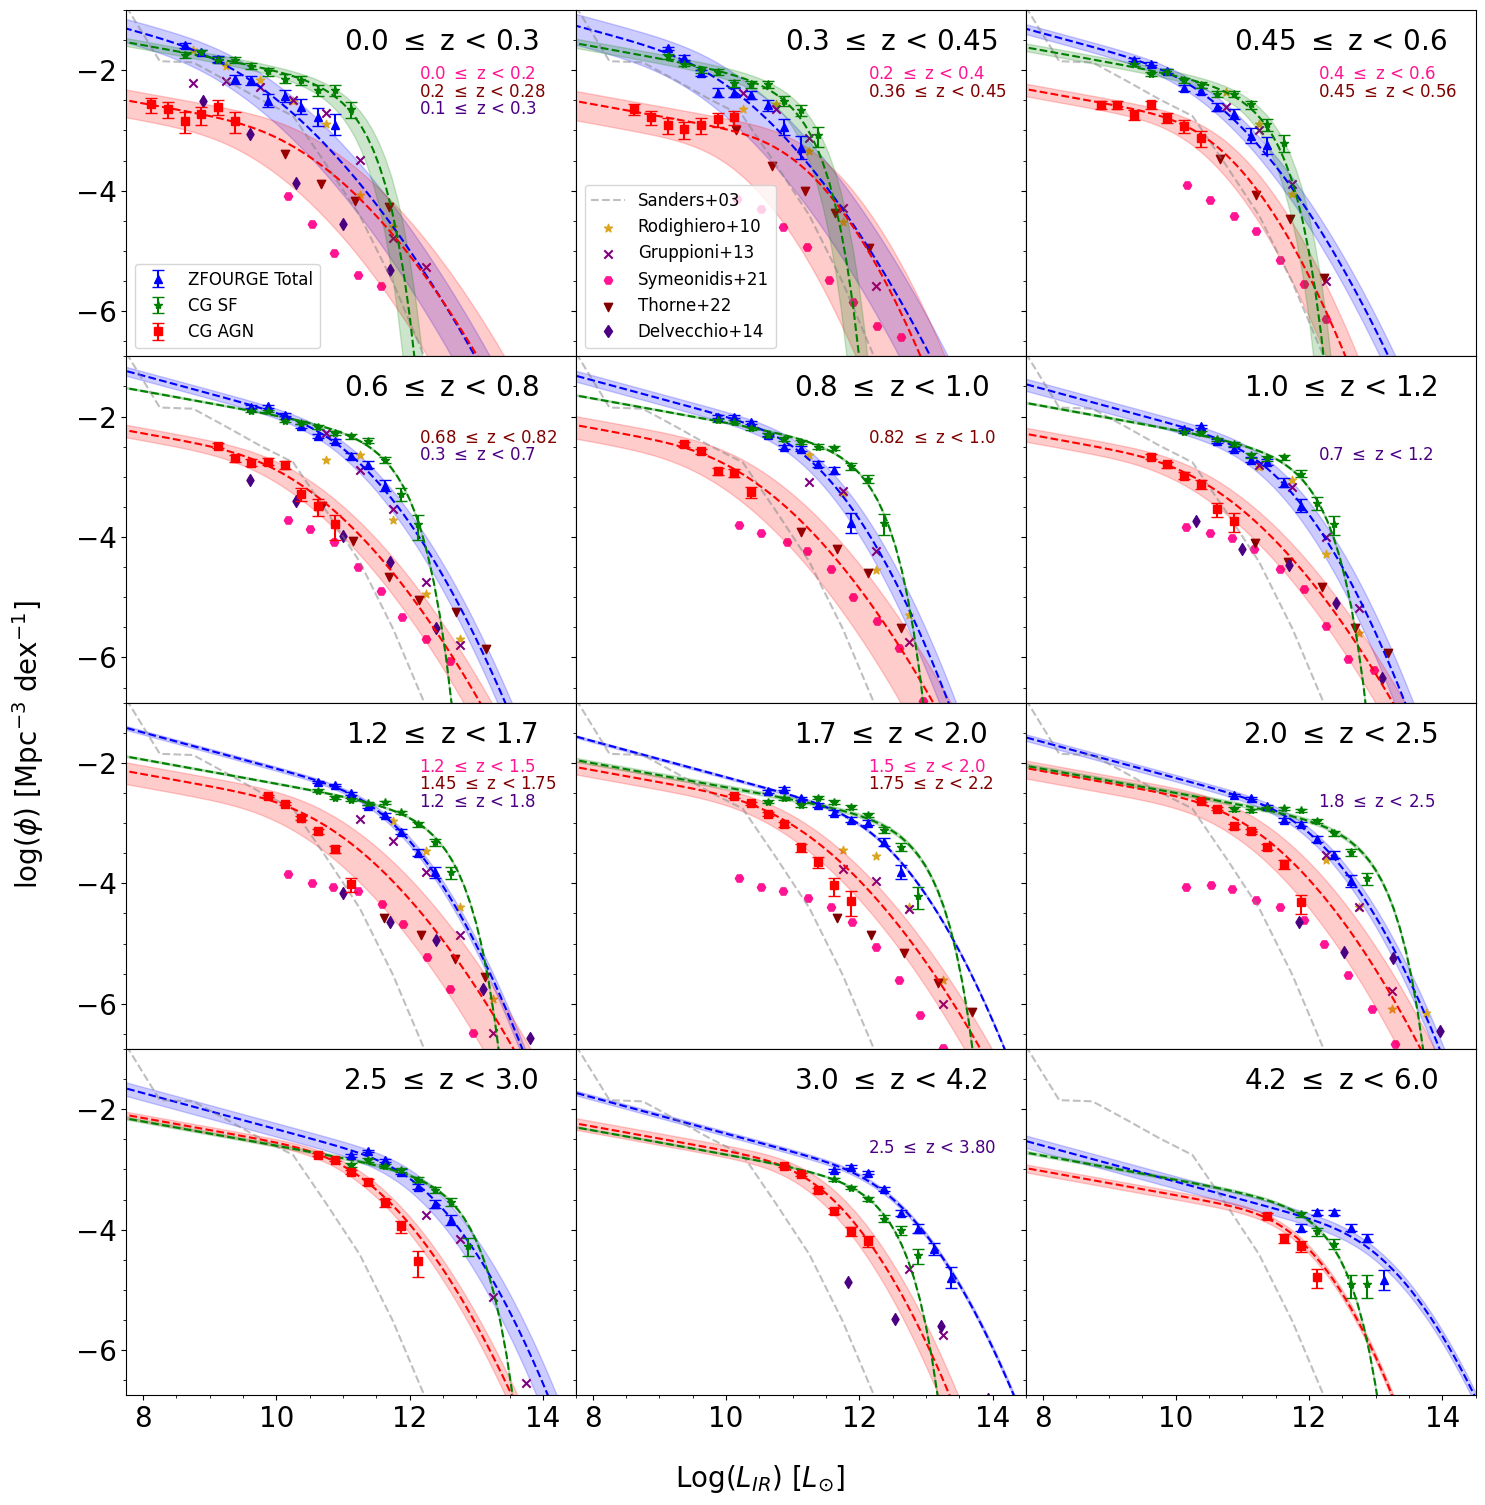

In [6]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

fig, axes = plt.subplots(4, 3, figsize=(15, 15), sharex=True, sharey=True)
axes = axes.flatten()

def agn_saunders_luminosity(L, L_star, phi_star, sigma):
    return phi_star * (L / L_star) ** (1-1.2) * np.exp(-1 / (2 * sigma ** 2) * (np.log10(1 + (L / L_star)))**2)

# ZFOURGE TOTAL
for i, (ax, l, p, e, params, perr, (z_start, z_end), min_l, sigma) in enumerate(zip(axes, ZF_ALL['x'], ZF_ALL['y'], ZF_ALL['e'], ZF_ALL['saunder_p'], ZF_ALL['saunder_e'], ZF_ALL['z'], ZF_ALL['m'], ZF_ALL['s'])):

    # Phi values
    yerr = np.array(e) / (np.array(p) * np.log(10))    
    ax.errorbar(l, np.log10(p), yerr=yerr, ls='none', marker='^', capsize=4, label='ZFOURGE Total' if i == 0 else '', color='blue')

    # Saunders Fit
    l = np.logspace(6, 15, 100)
    ax.plot(np.log10(l), np.log10(saunders_luminosity(l, *params, sigma)), label='Saunders Fit' if i == 2 else "", color='blue', linestyle='--')
    p_up = params + perr
    p_down = np.abs(params - perr)
    ax.fill_between(np.log10(l), 
        np.log10(saunders_luminosity(l, *p_down, sigma)), 
        np.log10(saunders_luminosity(l, *p_up, sigma)), 
        color='blue', alpha=0.2, label='Fit Error' if i == 2 else "")

# Sanders local
for i, ax in enumerate(axes):
    ax.plot(sanders_local_l, sanders_local_p, label=f'Sanders+03' if i == 1 else '', color='grey', linestyle='--', alpha=0.5)

# Rodighiero
for i, (ax, lum, phi) in enumerate(zip(axes, R_L, R_P)):
    ax.scatter(lum, phi, color='goldenrod', marker='*', label='Rodighiero+10' if i == 1 else '')
    
# Gruppioni
for i, (ax, lum, phi) in enumerate(zip(axes, G_L, G_P)):
    ax.scatter(lum, phi, color='purple', marker='x', label='Gruppioni+13' if i == 1 else '')

# Symeonidis
for i, (ax, lum, phi) in enumerate(zip(axes, S_L, S_P)):
    ax.scatter(lum, phi, color='deeppink', marker='H', label='Symeonidis+21' if i == 1 else "")

# Thorne
for i, (ax, lum, phi) in enumerate(zip(axes, T_L, T_P)):
    ax.scatter(np.log10(np.array(lum)*(2.612*10**-34)), np.log10(phi), color='maroon', marker='v', label='Thorne+22' if i == 1 else "")

""" CIGALE SF """
for i, (ax, l, p, e, (z_start, z_end)) in enumerate(zip(axes, CG_SF['x'], CG_SF['y'], CG_SF['e'], CG_SF['z'])):
    yerr = [np.log10(p) - np.log10(p - e), np.log10(p + e) - np.log10(p)]
    ax.errorbar(l, np.log10(p), yerr=yerr, ls='none', marker='*', capsize=4, label='CG SF' if i == 0 else '', color='green')

""" CIGALE AGN """
for i, (ax, l, p, e) in enumerate(zip(axes, CG_AGN['x'], CG_AGN['y'], CG_AGN['e'])):
    yerr = [np.log10(p) - np.log10(p - e), np.log10(p + e) - np.log10(p)]
    ax.errorbar(l, np.log10(p), yerr=yerr, ls='none', marker='s', capsize=4, label='CG AGN' if i == 0 else '', color='red')

""" ZFOURGE Quiescent """
# for i, (ax, l, p, e, (z_start, z_end)) in enumerate(zip(axes, ZF_QUI['x'], ZF_QUI['y'], ZF_QUI['e'], ZF_QUI['z'])):
#     try:
#         yerr = [np.log10(p) - np.log10(p - e), np.log10(p + e) - np.log10(p)]
#     except TypeError:
#         continue
#     ax.errorbar(l, np.log10(p), yerr=yerr, ls='none', marker='o', capsize=4, label='ZF QUI' if i == 0 else '', color='orange')

""" ZFOURGE Star Forming """
# for i, (ax, l, p, e, (z_start, z_end)) in enumerate(zip(axes, ZF_SF['x'], ZF_SF['y'], ZF_SF['e'], ZF_SF['z'])):
#     yerr = [np.log10(p) - np.log10(p - e), np.log10(p + e) - np.log10(p)]
#     ax.errorbar(l, np.log10(p), yerr=yerr, ls='none', marker='^', capsize=4, label='ZF SF' if i == 0 else '', color='blue')

""" CIGALE AGN Saunders Fit """
for i, (ax, p, perr, sigma) in enumerate(zip(axes, CG_AGN['saunder_p'], CG_AGN['saunder_e'], CG_AGN['s'])):
    l = np.logspace(6, 15, 100)
    if p[0] is None:
        continue
    ax.plot(np.log10(l), np.log10(agn_saunders_luminosity(l, *p, sigma)), label='Saunders Fit' if i == 2 else "", color='red', linestyle='--')
    ax.fill_between(np.log10(l), 
        np.log10(agn_saunders_luminosity(l, *np.abs(p - perr), sigma)), 
        np.log10(agn_saunders_luminosity(l, *(p + perr), sigma)), 
        color='red', alpha=0.2, label='Fit Error' if i == 2 else "")

""" CIGALE SF Schechter Fit """
for i, (ax, p, perr) in enumerate(zip(axes, CG_SF['schech_p'], CG_SF['schech_e'])):
    l = np.logspace(6, 15, 100)
    ax.plot(np.log10(l), np.log10(schechter_luminosity(l, *p)), label='Schechter Fit' if i == 2 else "", color='green', linestyle='--')
    ax.fill_between(np.log10(l), 
        np.log10(schechter_luminosity(l, *np.abs(p - perr))), 
        np.log10(schechter_luminosity(l, *(p + perr))), 
        color='green', alpha=0.2, label='Fit Error' if i == 2 else "")

""" Delvecchio+14 """
axes[0].scatter(D_L_03, np.log10(D_P_03), color='indigo', marker='d')
axes[3].scatter(D_L_07, np.log10(D_P_07), color='indigo', marker='d')
axes[5].scatter(D_L_12, np.log10(D_P_12), color='indigo', marker='d')
axes[6].scatter(D_L_18, np.log10(D_P_18), color='indigo', marker='d')
axes[8].scatter(D_L_25, np.log10(D_P_25), color='indigo', marker='d')
axes[10].scatter(D_L_38, np.log10(D_P_38), color='indigo', marker='d')

axes[0].text(x=0.65, y=0.70, s='0.1 $\leq$ z < 0.3', ha='left', fontsize=12, transform=axes[0].transAxes, color='indigo')
axes[3].text(x=0.65, y=0.70, s='0.3 $\leq$ z < 0.7', ha='left', fontsize=12, transform=axes[3].transAxes, color='indigo')
axes[5].text(x=0.65, y=0.70, s='0.7 $\leq$ z < 1.2', ha='left', fontsize=12, transform=axes[5].transAxes, color='indigo')
axes[6].text(x=0.65, y=0.70, s='1.2 $\leq$ z < 1.8', ha='left', fontsize=12, transform=axes[6].transAxes, color='indigo')
axes[8].text(x=0.65, y=0.70, s='1.8 $\leq$ z < 2.5', ha='left', fontsize=12, transform=axes[8].transAxes, color='indigo')
axes[10].text(x=0.65, y=0.70, s='2.5 $\leq$ z < 3.80', ha='left', fontsize=12, transform=axes[10].transAxes, color='indigo')

# """ CIGALE SF Saunders Fit """
# for i, (ax, p, perr, sigma) in enumerate(zip(axes, CG_SF['saunder_p'], CG_SF['saunder_e'], [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])):
#     l = np.logspace(6, 15, 100)
#     ax.plot(np.log10(l), np.log10(saunders_luminosity(l, *p, sigma)), label='Saunders Fit' if i == 2 else "", color='lime', linestyle='--')
#     ax.fill_between(np.log10(l), 
#         np.log10(saunders_luminosity(l, *np.abs(p - perr), sigma)), 
#         np.log10(saunders_luminosity(l, *(p + perr), sigma)), 
#         color='lime', alpha=0.2, label='Fit Error' if i == 2 else "")
    
# """ CIGALE TOTAL """
# for i, (ax, l, p, e, min_l) in enumerate(zip(axes, CG_ALL['x'], CG_ALL['y'], CG_ALL['e'], CG_ALL['m'])):
#     yerr = [np.log10(p) - np.log10(p - e), np.log10(p + e) - np.log10(p)]
#     ax.errorbar(l, np.log10(p), yerr=yerr, ls='none', marker='s', capsize=4, label='CG TOTAL' if i == 0 else '', color='gold')

# Axis setup
for ax, (z_start, z_end) in zip(axes, ZF_ALL['z']):
    ax.set_title(f'{z_start} $\leq$ z < {z_end}', y=0.86, x=0.7, fontsize=20)
    ax.set_xticks([8,10,12,14])
    ax.set_yticks([-6,-4,-2])
    ax.tick_params(axis='both', labelsize=20)
    ax.minorticks_on()
    ax.set_xlim(7.75, 14.5)
    ax.set_ylim(-6.75, -1)

""" Symeonidis Redshift """
symeo_z = [(0.0, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, 1.0), (1.0, 1.2), (1.2, 1.5), (1.5, 2.0), (2.0, 2.5)]
for i, (ax, (z_start, z_end)) in enumerate(zip(axes, symeo_z)):
    if i in [3,4,5,8]:
        continue
    ax.text(x=0.65, y=0.80, s=f'{z_start} $\leq$ z < {z_end}', ha='left', fontsize=12, transform=ax.transAxes, color='deeppink')
    
""" Thorne Redshift """
thorne_z = [(0.2, 0.28), (0.36, 0.45), (0.45, 0.56), (0.68, 0.82), (0.82, 1.0), (1.0, 1.2), (1.45, 1.75), (1.75, 2.20)]
for i, (ax, (z_start, z_end)) in enumerate(zip(axes, thorne_z)):
    if i in [5]:
        continue
    ax.text(x=0.65, y=0.75, s=f'{z_start} $\leq$ z < {z_end}', ha='left', fontsize=12, transform=ax.transAxes, color='maroon')

# Legend
axes[0].legend(loc='lower left', fontsize=12)
init_leg = axes[1].legend(loc='lower left', fontsize=12)

# Custom legend
handles, labels = axes[1].get_legend_handles_labels()
delvecchio = Line2D([0], [0], color='indigo', marker='d', linestyle='None', label='Delvecchio+14')
handles.append(delvecchio)
labels.append('Delvecchio+14')
axes[1].legend(handles=handles, labels=labels, loc='lower left', fontsize=12)


fig.supxlabel('Log($L_{IR}$) [$L_{\odot}$]', y=0, fontsize=20)
fig.supylabel('log($\phi$) [Mpc$^{-3}$ dex$^{-1}$]', x=0, fontsize=20)
plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)
# if export:
plt.savefig('LF.png', dpi=600)
plt.show()

# $0.6 \leq z < 0.8$ -- One Plot

In [ ]:
# z = ZF_ALL['z']
# one_plots = [0] # Redshift bins to plot
# l = np.logspace(6, 15, 100)

# # Rodighiero
# for i, one_plot in enumerate(one_plots):
#     if one_plot in [0,1,2,3,4,5,6,7,8]:
#         plt.scatter(R_L[one_plot], R_P[one_plot], color='goldenrod', marker='*', label='Rodighiero+10' if i == 0 else '')
        
#     # Gruppioni
#     if one_plot in [0,1,2,3,4,5,6,7,8,9,10]:
#         plt.scatter(G_L[one_plot], G_P[one_plot], color='purple', marker='x', label='Gruppioni+13' if i == 0 else '')

#     # Fu 0.6 < z < 0.8
#     if one_plot == 3:
#         plt.scatter(x=[11.60, 11.75, 11.90, 12.05, 12.20, 12.35, 12.50, 12.80], y=[-2.83, -3.08, -3.44, -3.78, -4.38, -4.66, -5.43, -5.43], label='Fu+10', marker='D', color='lime')

#     # CIGALE SF
#     yerr=[np.log10(CG_SF['y'][one_plot]) - np.log10(CG_SF['y'][one_plot] - CG_SF['e'][one_plot]), np.log10(CG_SF['y'][one_plot] + CG_SF['e'][one_plot]) - np.log10(CG_SF['y'][one_plot])]
#     plt.errorbar(CG_SF['x'][one_plot], np.log10(CG_SF['y'][one_plot]), yerr=yerr, ls='none', marker='*', capsize=4, label='CIGALE SF' if i == 0 else '', color='green')

#     """ CIGALE AGN Saunders Fit """
#     # yerr=[np.log10(CG_AGN['y'][one_plot]) - np.log10(CG_AGN['y'][one_plot] - CG_AGN['e'][one_plot]), np.log10(CG_AGN['y'][one_plot] + CG_AGN['e'][one_plot]) - np.log10(CG_AGN['y'][one_plot])]
#     # plt.errorbar(CG_AGN['x'][one_plot], np.log10(CG_AGN['y'][one_plot]), yerr=yerr, ls='none', marker='s', capsize=4, label='CIGALE AGN' if i == 0 else '', color='red')
#     # plt.plot(np.log10(l), np.log10(saunders_luminosity(l, *CG_AGN['saunder_p'][one_plot])), label='Saunders Fit' if i == 0 else '', color='red', linestyle='--')
#     # plt.fill_between(np.log10(l),
#     #     np.log10(saunders_luminosity(l, *CG_AGN['saunder_p'][one_plot] - CG_AGN['saunder_e'][one_plot])),
#     #     np.log10(saunders_luminosity(l, *CG_AGN['saunder_p'][one_plot] + CG_AGN['saunder_e'][one_plot])),
#     #     color='red', alpha=0.2)
    
#     # CIGALE AGN Schechter Fit
#     yerr=[np.log10(CG_AGN['y'][one_plot]) - np.log10(CG_AGN['y'][one_plot] - CG_AGN['e'][one_plot]), np.log10(CG_AGN['y'][one_plot] + CG_AGN['e'][one_plot]) - np.log10(CG_AGN['y'][one_plot])]
#     plt.errorbar(CG_AGN['x'][one_plot], np.log10(CG_AGN['y'][one_plot]), yerr=yerr, ls='none', marker='s', capsize=4, label='CIGALE AGN' if i == 0 else '', color='red')
#     plt.plot(np.log10(l), np.log10(schechter_luminosity(l, *CG_AGN['schech_p'][one_plot])), label='Schechter Fit' if i == 0 else '', color='red', linestyle='--')
#     plt.fill_between(np.log10(l),
#         np.log10(schechter_luminosity(l, *np.abs(CG_AGN['schech_p'][one_plot] - CG_AGN['schech_e'][one_plot]))),
#         np.log10(schechter_luminosity(l, *(CG_AGN['schech_p'][one_plot] + CG_AGN['schech_e'][one_plot]))),
#         color='red', alpha=0.2)

#     # ZFOURGE QUI
#     yerr=[np.log10(ZF_QUI['y'][one_plot]) - np.log10(ZF_QUI['y'][one_plot] - ZF_QUI['e'][one_plot]), np.log10(ZF_QUI['y'][one_plot] + ZF_QUI['e'][one_plot]) - np.log10(ZF_QUI['y'][one_plot])]
#     plt.errorbar(ZF_QUI['x'][one_plot], np.log10(ZF_QUI['y'][one_plot]), yerr=yerr, ls='none', marker='o', capsize=4, label='ZFOURGE Quiescent' if i == 0 else '', color='orange')

#     # ZFOURGE TOTAL
#     yerr=[np.log10(ZF_ALL['y'][one_plot]) - np.log10(ZF_ALL['y'][one_plot] - ZF_ALL['e'][one_plot]), np.log10(ZF_ALL['y'][one_plot] + ZF_ALL['e'][one_plot]) - np.log10(ZF_ALL['y'][one_plot])]
#     plt.errorbar(ZF_ALL['x'][one_plot], np.log10(ZF_ALL['y'][one_plot]), yerr=yerr, ls='none', marker='o', capsize=4, label='ZFOURGE Total' if i == 0 else '', color='C0')
#     plt.axvline(ZF_ALL['m'][one_plot], color='blue', linestyle='-.', alpha=0.5, label='Completeness' if i == 0 else '') # min LIR
#     plt.plot(np.log10(l), np.log10(saunders_luminosity(l, *ZF_ALL['saunder_p'][one_plot], ZF_ALL['s'][one_plot])), label='Saunders Fit' if i == 0 else '', color='blue', linestyle='--') # Saunders Fit
#     plt.fill_between(np.log10(l),
#         np.log10(saunders_luminosity(l, *np.abs(ZF_ALL['saunder_p'][one_plot] - ZF_ALL['saunder_e'][one_plot]), ZF_ALL['s'][one_plot])),
#         np.log10(saunders_luminosity(l, *(ZF_ALL['saunder_p'][one_plot] + ZF_ALL['saunder_e'][one_plot]), ZF_ALL['s'][one_plot])),
#         color='blue', alpha=0.2)
#     plt.title(f'{z[one_plot][0]} $\leq$ z < {z[one_plot][1]}', y=0.86, x=0.7, fontsize=20)
    
# # plt.text(7.5, -3, '$0 \leq z < 0.3$', color='black', fontsize=12)
# # plt.text(11.5, -3, '$4.2 \leq z < 6.0$', color='black', fontsize=12)
# plt.ylabel('log($\phi$) [Mpc$^{-3}$ dex$^{-1}$]', fontsize=20)
# plt.xlabel('Log($L_{IR}$) [$L_{\odot}$]', fontsize=20)
# plt.xlim(6, 14)
# plt.ylim(-7.5, -1)
# plt.tick_params(axis='both', labelsize=20)
# plt.legend(loc='lower left', fontsize=12, bbox_to_anchor=(1, 0.1))
# plt.show()

## ZFOURGE Parameter Evolution

In [ ]:
# fig, ax = plt.subplots(2, 1, figsize=(7, 7), sharex=True)
# redshift_centers = np.mean(ZF_ALL['z'], axis=1)

# """ ZFOURGE Lstar """
# ZF_LSTAR_params = ZF_ALL['saunder_p'][:,0].astype(float)
# ZF_LSTAR_errors = ZF_ALL['saunder_e'][:,0].astype(float)
# ax[0].errorbar(redshift_centers, np.log10(ZF_LSTAR_params), yerr=(ZF_LSTAR_errors / (ZF_LSTAR_params* np.log(10))), ls='none', capsize=4, marker='^', color='blue', label='ZF Total')

# """ ZFOURGE Phistar """
# ZF_PHISTAR_params = ZF_ALL['saunder_p'][:,1].astype(float)
# ZF_PHISTAR_errors = ZF_ALL['saunder_e'][:,1].astype(float)
# ax[1].errorbar(redshift_centers, np.log10(ZF_PHISTAR_params), yerr=(ZF_PHISTAR_errors / (ZF_PHISTAR_params* np.log(10))), ls='none', capsize=4, marker='^', label='ZF Total', color='blue')

# """ ZFOURGE SF Lstar """
# # ZF_SF_LSTAR_params = ZF_SF['saunder_p'][:,0].astype(float)
# # ZF_SF_LSTAR_errors = ZF_SF['saunder_e'][:,0].astype(float)
# # ax[0].errorbar(redshift_centers, np.log10(ZF_SF_LSTAR_params), yerr=(ZF_SF_LSTAR_errors / (ZF_SF_LSTAR_params* np.log(10))), ls='none', capsize=4, marker='o', label='ZF SF', color='green')

# """ ZFOURGE SF Phistar """
# # ZF_SF_PHISTAR_params = ZF_SF['saunder_p'][:,1].astype(float)
# # ZF_SF_PHISTAR_errors = ZF_SF['saunder_e'][:,1].astype(float)
# # ax[1].errorbar(redshift_centers, np.log10(ZF_SF_PHISTAR_params), yerr=(ZF_SF_PHISTAR_errors / (ZF_SF_PHISTAR_params* np.log(10))), ls='none', capsize=4, marker='o', label='ZF SF', color='blue')

# """ ZFOURGE QUI Lstar """
# params = [[float(f"{x[0]:.6e}"), float(f"{x[1]:.6e}")] for x in ZF_QUI['saunder_p'] if len(x) > 0]
# errors = [[float(f"{x[0]:.6e}"), float(f"{x[1]:.6e}")] for x in ZF_QUI['saunder_e'] if len(x) > 0]
# ZF_AGN_LSTAR_params = np.array(params)[:,0].astype(float)
# ZF_AGN_LSTAR_errors = np.array(errors)[:,0].astype(float)
# ax[0].errorbar(redshift_centers[:-1], np.log10(ZF_AGN_LSTAR_params), yerr=(ZF_AGN_LSTAR_errors / (ZF_AGN_LSTAR_params* np.log(10))), ls='none', capsize=4, marker='o', label='ZF Quiescent', color='orange')

# """ ZFOURGE QUI Phistar """
# ZF_AGN_PHISTAR_params = np.array(params)[:,1].astype(float)
# ZF_AGN_PHISTAR_errors = np.array(errors)[:,1].astype(float)
# ax[1].errorbar(redshift_centers[:-1], np.log10(ZF_AGN_PHISTAR_params), yerr=(ZF_AGN_PHISTAR_errors / (ZF_AGN_PHISTAR_params* np.log(10))), ls='none', capsize=4, marker='o', label='ZF Quiescent $\phi_{*}$', color='orange')

# """ Gruppioni """
# grup_z = [0.15, 0.375, 0.525, 0.7, 0.9, 1.1, 1.45, 1.85, 2.25, 2.75, 3.6]
# grup_phistar = [-2.27, -2.31, -2.35, -2.34, -2.39, -2.43, -2.69, -2.86, -3.00, -3.28, -3.75]
# grup_lstar = [10.12, 10.42, 10.53, 10.71, 10.97, 11.13, 11.38, 11.50, 11.60, 11.91, 11.90]
# ax[0].scatter(grup_z, grup_lstar, label='Gruppioni+13', color='purple', marker='x')
# ax[1].scatter(grup_z, grup_phistar, color='purple', marker='x')

# """ Magnelli """
# mag_z = [0, 0.25, 0.55, 0.85, 1.15, 1.55, 2.05]
# mag_phistar = [-2.52, -2.85, -2.82, -2.96, -3.01, -3.29, -3.47]
# mag_lstar = [10.48, 10.84, 11.28, 11.53, 11.71, 12.00, 12.35]
# ax[0].scatter(mag_z, mag_lstar, label='Magnelli+13', color='magenta', marker='P')
# ax[1].scatter(mag_z, mag_phistar, color='magenta', marker='P')

# """ Caputi """
# cap_z = [1, 1.93]
# cap_phistar = [-2.397, -3.036]
# cap_lstar = [11.397, 11.785]
# ax[0].scatter(cap_z, cap_lstar, label='Caputi+07', color='cyan', marker='$\Psi$')
# ax[1].scatter(cap_z, cap_phistar, color='cyan', marker='$\Psi$')


# ax[0].legend(loc='lower right', fontsize=12)
# ax[0].set_ylabel('log$(L_{*})$ [$L_{\odot}$]', fontsize=20)
# ax[0].tick_params(axis='both', labelsize=20)

# ax[1].set_ylabel('log$(\phi_{*})$ [Mpc$^{-3}$ dex$^{-1}$]', fontsize=20)
# ax[1].tick_params(axis='both', labelsize=20)

# print(ZF_ALL['saunder_p'][:,1].astype(float))
# print(redshift_centers)



# fig.supxlabel('z', fontsize=20, x=0.56)
# plt.tight_layout()
# plt.subplots_adjust(hspace=0)
# if export:
#     plt.savefig('ZF_param_evo.png', dpi=300)
# plt.show()

## CIGALE Parameter Evolution

[0.15 0.375 0.525 0.7 0.9 1.1 1.45 1.85 2.25 2.75 3.6 5.1]
[-2.2, -2.2, -2.32, -2.31, -2.5, -2.6, -2.83, -2.96, -3.06, -3.13, -3.21, -3.61]
[0.04, 0.05, 0.04, 0.01, 0.01, 0.02, 0.02, 0.03, 0.03, 0.02, 0.01, 0.02]
ZF Lstar
----------
z < 1.0: y = log_10(10^(8.05 +/- 0.27) * (1 + z)^(8.55 +/- 0.98))
z > 1.0: y = log_10(10^(9.17 +/- 0.34) * (1 + z)^(3.93 +/- 0.44))

ZF Phistar
----------
z < 1.0: y = log_10(10^(-1.3 +/- 0.06) * (1 + z)^(-2.63 +/- 0.42))
z > 1.0: y = log_10(10^(-1.66 +/- 0.14) * (1 + z)^(-1.97 +/- 0.33))

CG AGN Lstar
----------
z < 1.0: y = log_10(10^(9.92 +/- 0.61) * (1 + z)^(-1.09 +/- 3.62))
z > 1.0: y = log_10(10^(7.85 +/- 0.11) * (1 + z)^(4.2 +/- 0.15))

CG AGN Phistar
----------
z < 1.0: y = log_10(10^(-3.18 +/- 0.19) * (1 + z)^(2.77 +/- 0.8))
z > 1.0: y = log_10(10^(-2.19 +/- 0.2) * (1 + z)^(-0.88 +/- 0.42))

CG SF Lstar
----------
z < 2.0: y = log_10(10^(10.21 +/- 0.16) * (1 + z)^(5.65 +/- 0.36))
z > 2.0: y = log_10(10^(14.24 +/- 0.25) * (1 + z)^(-2.8 +/- 0.45))

C

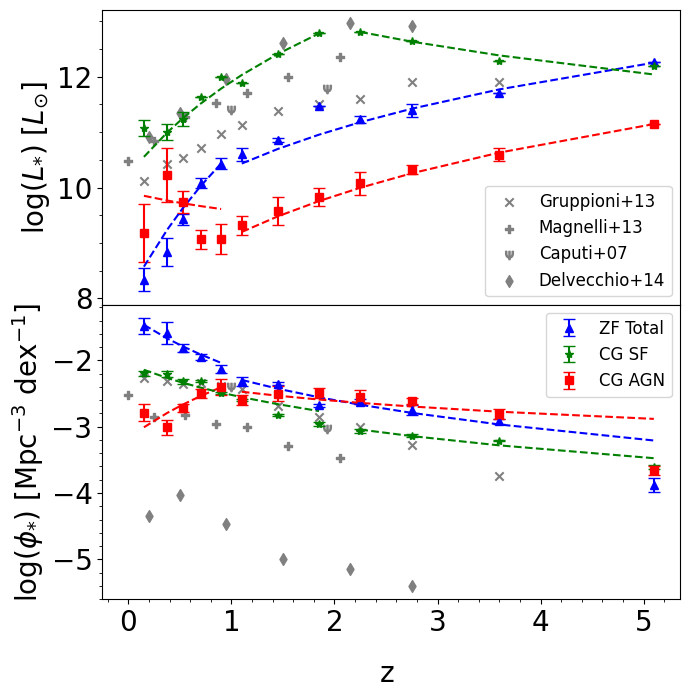

In [7]:
fig, ax = plt.subplots(2, 1, figsize=(7, 7), sharex=True)
redshift_centers = np.mean(ZF_ALL['z'], axis=1)

from scipy.optimize import curve_fit

def one_plus_z(z, a, k):
    return a*(1 + z)**k

def get_params(x, y, z, ax, color, title=None):
    first_index = np.where(x <= z)[0][-1]+1

    # Left of z break
    params_lb, covars_lb = curve_fit(one_plus_z, x[:first_index], y[:first_index], p0=[y[0], 2])
    perr_lb = np.sqrt(np.diag(covars_lb))
    perr_lb[0] = perr_lb[0] / (params_lb[0] * np.log(10))
    params_lb[0] = np.log10(params_lb[0])
    ax.plot(x[:first_index], np.log10(one_plus_z(x[:first_index], 10**params_lb[0], params_lb[1]).astype(float)), color=color, linestyle='--')

    # Right of z break
    params_rb, covars_rb = curve_fit(one_plus_z, x[first_index:], y[first_index:], p0=[y[0], 2])
    perr_rb = np.sqrt(np.diag(covars_rb))
    perr_rb[0] = perr_rb[0] / (params_rb[0] * np.log(10))
    params_rb[0] = np.log10(params_rb[0])
    ax.plot(x[first_index:], np.log10(one_plus_z(x[first_index:], 10**params_rb[0], params_rb[1]).astype(float)), color=color, linestyle='--')
    
    if title is not None:
        print(title)
        print('----------')
        print(f'z < {z}: y = log_10(10^({np.round(params_lb[0],2)} +/- {np.round(perr_lb[0],2)}) * (1 + z)^({np.round(params_lb[1],2)} +/- {np.round(perr_lb[1],2)}))')
        print(f'z > {z}: y = log_10(10^({np.round(params_rb[0],2)} +/- {np.round(perr_rb[0],2)}) * (1 + z)^({np.round(params_rb[1],2)} +/- {np.round(perr_rb[1],2)}))')
        print()
    return (params_lb, perr_lb), (params_rb, perr_rb)

""" ZFOURGE Lstar """
ZF_LSTAR_params = ZF_ALL['saunder_p'][:,0].astype(float)
ZF_LSTAR_errors = ZF_ALL['saunder_e'][:,0].astype(float)
ax[0].errorbar(redshift_centers, np.log10(ZF_LSTAR_params), yerr=(ZF_LSTAR_errors / (ZF_LSTAR_params* np.log(10))), ls='none', capsize=4, marker='^', color='blue')

""" ZFOURGE Phistar """
ZF_PHISTAR_params = ZF_ALL['saunder_p'][:,1].astype(float)
ZF_PHISTAR_errors = ZF_ALL['saunder_e'][:,1].astype(float)
ax[1].errorbar(redshift_centers, np.log10(ZF_PHISTAR_params), yerr=(ZF_PHISTAR_errors / (ZF_PHISTAR_params* np.log(10))), ls='none', capsize=4, marker='^', label='ZF Total', color='blue')

""" ZFOURGE SF Lstar """
# ZF_SF_LSTAR_params = ZF_SF['saunder_p'][:,0].astype(float)
# ZF_SF_LSTAR_errors = ZF_SF['saunder_e'][:,0].astype(float)
# ax[0].errorbar(redshift_centers, np.log10(ZF_SF_LSTAR_params), yerr=(ZF_SF_LSTAR_errors / (ZF_SF_LSTAR_params* np.log(10))), ls='none', capsize=4, marker='o', label='ZF SF', color='green')

""" ZFOURGE SF Phistar """
# ZF_SF_PHISTAR_params = ZF_SF['saunder_p'][:,1].astype(float)
# ZF_SF_PHISTAR_errors = ZF_SF['saunder_e'][:,1].astype(float)
# ax[1].errorbar(redshift_centers, np.log10(ZF_SF_PHISTAR_params), yerr=(ZF_SF_PHISTAR_errors / (ZF_SF_PHISTAR_params* np.log(10))), ls='none', capsize=4, marker='o', label='ZF SF', color='blue')

""" ZFOURGE QUI Lstar """
# params = [[float(f"{x[0]:.6e}"), float(f"{x[1]:.6e}")] for x in ZF_QUI['saunder_p'] if len(x) > 0]
# errors = [[float(f"{x[0]:.6e}"), float(f"{x[1]:.6e}")] for x in ZF_QUI['saunder_e'] if len(x) > 0]
# ZF_AGN_LSTAR_params = np.array(params)[:,0].astype(float)
# ZF_AGN_LSTAR_errors = np.array(errors)[:,0].astype(float)
# ax[0].errorbar(redshift_centers[:-1], np.log10(ZF_AGN_LSTAR_params), yerr=(ZF_AGN_LSTAR_errors / (ZF_AGN_LSTAR_params* np.log(10))), ls='none', capsize=4, marker='o', color='orange')

""" ZFOURGE QUI Phistar """
# ZF_AGN_PHISTAR_params = np.array(params)[:,1].astype(float)
# ZF_AGN_PHISTAR_errors = np.array(errors)[:,1].astype(float)
# ax[1].errorbar(redshift_centers[:-1], np.log10(ZF_AGN_PHISTAR_params), yerr=(ZF_AGN_PHISTAR_errors / (ZF_AGN_PHISTAR_params* np.log(10))), ls='none', capsize=4, marker='o', label='ZF Quiescent', color='orange')





""" CIGALE SF Lstar Schechter """
CG_SF_LSTAR_params = CG_SF['schech_p'][:,0].astype(float)
CG_SF_LSTAR_errors = CG_SF['schech_e'][:,0].astype(float)
ax[0].errorbar(redshift_centers, np.log10(CG_SF_LSTAR_params), yerr=(CG_SF_LSTAR_errors / (CG_SF_LSTAR_params* np.log(10))), ls='none', capsize=4, marker='*', color='green')

""" CIGALE SF Phistar Schechter """
CG_SF_PHISTAR_params = CG_SF['schech_p'][:,1].astype(float)
CG_SF_PHISTAR_errors = CG_SF['schech_e'][:,1].astype(float)
ax[1].errorbar(redshift_centers, np.log10(CG_SF_PHISTAR_params), yerr=(CG_SF_PHISTAR_errors / (CG_SF_PHISTAR_params* np.log(10))), ls='none', capsize=4, marker='*', label='CG SF', color='green')

print(redshift_centers)
print(np.round(np.log10(CG_SF_PHISTAR_params),2).tolist())
print(np.round(CG_SF_PHISTAR_errors / (CG_SF_PHISTAR_params* np.log(10)),2).tolist())

# """ CIGALE SF Lstar Saunders """
# CG_SF_LSTAR_params = CG_SF['saunder_p'][:,0].astype(float)
# CG_SF_LSTAR_errors = CG_SF['saunder_e'][:,0].astype(float)
# ax[0].errorbar(redshift_centers, np.log10(CG_SF_LSTAR_params), yerr=(CG_SF_LSTAR_errors / (CG_SF_LSTAR_params* np.log(10))), ls='none', capsize=4, marker='*', color='green')

# """ CIGALE SF Phistar Saunders """
# CG_SF_PHISTAR_params = CG_SF['saunder_p'][:,1].astype(float)
# CG_SF_PHISTAR_errors = CG_SF['saunder_e'][:,1].astype(float)
# ax[1].errorbar(redshift_centers, np.log10(CG_SF_PHISTAR_params), yerr=(CG_SF_PHISTAR_errors / (CG_SF_PHISTAR_params* np.log(10))), ls='none', capsize=4, marker='*', label='CG SF', color='green')

# """ CIGALE AGN Lstar Schechter """
# CG_AGN_LSTAR_params = CG_AGN['schech_p'][:,0].astype(float)
# CG_AGN_LSTAR_errors = CG_AGN['schech_e'][:,0].astype(float)
# ax[0].errorbar(redshift_centers, np.log10(CG_AGN_LSTAR_params), yerr=(CG_AGN_LSTAR_errors / (CG_AGN_LSTAR_params* np.log(10))), ls='none', capsize=4, marker='s', label='CG AGN $L_{*}$', color='red')

# """ CIGALE AGN Phistar Schechter """
# CG_AGN_PHISTAR_params = CG_AGN['schech_p'][:,1].astype(float)
# CG_AGN_PHISTAR_errors = CG_AGN['schech_e'][:,1].astype(float)
# ax[1].errorbar(redshift_centers, np.log10(CG_AGN_PHISTAR_params), yerr=(CG_AGN_PHISTAR_errors / (CG_AGN_PHISTAR_params* np.log(10))), ls='none', capsize=4, marker='s', label='CG AGN $\phi_{*}$', color='red')

""" CIGALE AGN Lstar Saunders """
CG_AGN_LSTAR_params = CG_AGN['saunder_p'][:,0].astype(float)
CG_AGN_LSTAR_errors = CG_AGN['saunder_e'][:,0].astype(float)
ax[0].errorbar(redshift_centers, np.log10(CG_AGN_LSTAR_params), yerr=(CG_AGN_LSTAR_errors / (CG_AGN_LSTAR_params* np.log(10))), ls='none', capsize=4, marker='s', color='red')

""" CIGALE AGN Phistar Saunders """
CG_AGN_PHISTAR_params = CG_AGN['saunder_p'][:,1].astype(float)
CG_AGN_PHISTAR_errors = CG_AGN['saunder_e'][:,1].astype(float)
ax[1].errorbar(redshift_centers, np.log10(CG_AGN_PHISTAR_params), yerr=(CG_AGN_PHISTAR_errors / (CG_AGN_PHISTAR_params* np.log(10))), ls='none', capsize=4, marker='s', label='CG AGN', color='red')

""" CIGALE TOTAL Lstar """
# CG_LSTAR_params = CG_ALL['saunder_p'][:,0].astype(float)
# CG_LSTAR_errors = CG_ALL['saunder_e'][:,0].astype(float)
# ax[0].errorbar(redshift_centers, np.log10(CG_LSTAR_params), yerr=(CG_LSTAR_errors / (CG_LSTAR_params* np.log(10))), ls='none', capsize=4, marker='o', label='CG Total', color='C0')

""" CIGALE TOTAL Phistar """
# CG_PHISTAR_params = CG_ALL['saunder_p'][:,1].astype(float)
# CG_PHISTAR_errors = CG_ALL['saunder_e'][:,1].astype(float)
# ax[1].errorbar(redshift_centers, np.log10(CG_PHISTAR_params), yerr=(CG_PHISTAR_errors / (CG_PHISTAR_params* np.log(10))), ls='none', capsize=4, marker='o', label='CG Total', color='C0')

""" Gruppioni """
grup_z = [0.15, 0.375, 0.525, 0.7, 0.9, 1.1, 1.45, 1.85, 2.25, 2.75, 3.6]
grup_phistar = [-2.27, -2.31, -2.35, -2.34, -2.39, -2.43, -2.69, -2.86, -3.00, -3.28, -3.75]
grup_lstar = [10.12, 10.42, 10.53, 10.71, 10.97, 11.13, 11.38, 11.50, 11.60, 11.91, 11.90]
ax[0].scatter(grup_z, grup_lstar, label='Gruppioni+13', color='grey', marker='x')
ax[1].scatter(grup_z, grup_phistar, color='grey', marker='x')

""" Magnelli """
mag_z = [0, 0.25, 0.55, 0.85, 1.15, 1.55, 2.05]
mag_phistar = [-2.52, -2.85, -2.82, -2.96, -3.01, -3.29, -3.47]
mag_lstar = [10.48, 10.84, 11.28, 11.53, 11.71, 12.00, 12.35]
ax[0].scatter(mag_z, mag_lstar, label='Magnelli+13', color='grey', marker='P')
ax[1].scatter(mag_z, mag_phistar, color='grey', marker='P')

""" Caputi """
cap_z = [1, 1.93]
cap_phistar = [-2.397, -3.036]
cap_lstar = [11.397, 11.785]
ax[0].scatter(cap_z, cap_lstar, label='Caputi+07', color='grey', marker='$\Psi$')
ax[1].scatter(cap_z, cap_phistar, color='grey', marker='$\Psi$')

""" Delvecchio """
devl_z = [0.2, 0.5, 0.95, 1.5, 2.15, 2.75]
delv_phistar = [-4.35, -4.03, -4.47, -5.00, -5.15, -5.40]
delv_lstar = [10.91, 11.34, 11.96, 12.61, 12.96, 12.92]
ax[0].scatter(devl_z, delv_lstar, label='Delvecchio+14', color='grey', marker='d')
ax[1].scatter(devl_z, delv_phistar, color='grey', marker='d')


ax[0].legend(loc='lower right', fontsize=12)
ax[0].set_ylabel('log$(L_{*})$ [$L_{\odot}$]', fontsize=20)
ax[0].tick_params(axis='both', labelsize=20)
ax[0].minorticks_on()

ax[1].legend(loc='upper right', fontsize=12)
ax[1].set_ylabel('log$(\phi_{*})$ [Mpc$^{-3}$ dex$^{-1}$]', fontsize=20)
ax[1].tick_params(axis='both', labelsize=20)
ax[1].minorticks_on()

get_params(redshift_centers, ZF_LSTAR_params, 1.0, ax[0], 'blue', title='ZF Lstar')
get_params(redshift_centers, ZF_PHISTAR_params, 1.0, ax[1], 'blue', title='ZF Phistar')

get_params(redshift_centers, CG_AGN_LSTAR_params, 1.0, ax[0], 'red', title='CG AGN Lstar')
get_params(redshift_centers, CG_AGN_PHISTAR_params, 1.0, ax[1], 'red', title='CG AGN Phistar')

get_params(redshift_centers, CG_SF_LSTAR_params, 2.0, ax[0], 'green', title='CG SF Lstar')
get_params(redshift_centers, CG_SF_PHISTAR_params, 2.0, ax[1], 'green', title='CG SF Phistar')

fig.supxlabel('z', fontsize=20, x=0.56)
plt.tight_layout()
plt.subplots_adjust(hspace=0)
if export:
    plt.savefig('Param Evo.png', dpi=300)
plt.show()

## ZFOURGE Star Formation Rate Density

In [ ]:
# lower_bound = 10**8
# upper_bound = 10**14
# redshift_centers = np.mean(ZF_ALL['z'], axis=1)
# fig, ax = plt.subplots(figsize=(8, 6))
# print(redshift_centers)

# def kennicutt_sfr(rho_ir):
#     return rho_ir / (1.7*10**10)

# def inverse_kennicutt_sfr(sfr):
#     return sfr * 1.7*10**10

# def saunder_area(params, perrors, lower_bound, upper_bound, sigmas):
#     results_area = []
#     for param, perr, sigma in zip(params, perrors, sigmas):
#         param = np.append(param, sigma)
#         perr = np.append(perr, 0)
#         area, _ = integrate.quad(saunders_luminosity, lower_bound, upper_bound, args=tuple(param))
#         area_up, _ = integrate.quad(saunders_luminosity, lower_bound, upper_bound, args=tuple(param+perr))
#         area_down, _ = integrate.quad(saunders_luminosity, lower_bound, upper_bound, args=tuple(np.abs(param-perr)))
#         results_area.append([area, area_up-area, area-area_down])

#     results_area = np.array(results_area)
#     area = results_area[:,0]
#     area_up = results_area[:,1]
#     area_down = results_area[:,2]
#     return area, area_up, area_down

# """ ZFOURGE Total """
# ZF_params = ZF_ALL['saunder_p'].astype(float)
# ZF_perr = ZF_ALL['saunder_e'].astype(float)
# ZF_sigmas = ZF_ALL['s'].astype(float)
# area, area_up, area_down = saunder_area(ZF_params, ZF_perr, lower_bound, upper_bound, ZF_sigmas)
# ax.errorbar(redshift_centers, area, yerr=[area_down, area_up], ls='none', capsize=5, marker='^', label='ZFOURGE Total', color='blue')

# # """ ZFOURGE QUI """
# params = [[float(f"{x[0]:.6e}"), float(f"{x[1]:.6e}")] for x in ZF_QUI['saunder_p'] if len(x) > 0]
# errors = [[float(f"{x[0]:.6e}"), float(f"{x[1]:.6e}")] for x in ZF_QUI['saunder_e'] if len(x) > 0]
# ZF_QUI_params = np.array(params).astype(float)
# ZF_QUI_perr = np.array(errors).astype(float)
# ZF_QUI_sigmas = ZF_QUI['s'].astype(float)
# area, area_up, area_down = saunder_area(ZF_QUI_params, ZF_QUI_perr, lower_bound, upper_bound, ZF_QUI_sigmas)
# ax.errorbar(redshift_centers[:-1], area, yerr=[np.abs(area_down), area_up], ls='none', capsize=5, marker='o', label='ZFOURGE Quiescent', color='orange')

# """ Gruppioni """
# grup_z = [0.15, 0.375, 0.525, 0.7, 0.9, 1.1, 1.45, 1.85, 2.25, 2.75, 3.6]
# grup_sfrd = [134927986, 224926598, 282833346, 419226743, 662870316, 904966813, 843374388, 785973970, 702973211, 776794465, 250011038]
# ax.scatter(grup_z, grup_sfrd, label='Gruppioni+13', color='purple', marker='x')

# """ Rodighiero """
# rod_z = [0.15, 0.375, 0.525, 0.7, 0.9, 1.1, 1.45, 1.85, 2.25]
# rod_sfrd = [114504756, 211935255, 412072148, 540281778, 726043374, 1103521372, 1202856733, 1217759418, 1103521372]
# ax.scatter(rod_z, rod_sfrd, label='Rodighiero+10', color='goldenrod', marker='*')

# """ Caputi """
# cap_z = [0.2, 1, 1.93]
# cap_sfrd = [250068075.84394366, 1.2*10**9, 6.6*10**8]
# ax.scatter(cap_z, cap_sfrd, label='Caputi+07', color='cyan', marker='$\Psi$', s=50)

# """ Magnelli """
# mag_z = [0.25, 0.55, 0.85, 1.15, 1.55, 2.05]
# mag_sfrd = [136110369.6312692, 408205320.6201911, 529479771.03657484, 720676873.4806798, 756242512.6761533, 1049350326.7611474]
# ax.scatter(mag_z, mag_sfrd, label='Magnelli+13', color='magenta', marker='P')

# aird_logz = [0.019, 0.04, 0.067, 0.088, 0.118, 0.145, 0.175, 0.203, 0.242, 0.288, 0.339, 0.415, 0.483, 0.543, 0.596, 0.633, 0.667, 0.695, 0.72, 0.75, 0.780]
# aird_sfrd = [2.93e+40, 4.10e+40, 5.73e+40, 7.74e+40, 1.14e+41, 1.62e+41, 2.39e+41, 3.12e+41, 4.36e+41, 6.32e+41, 8.53e+41, 1.092e+42, 1.073e+42, 8.38e+41, 5.488e+41, 3.789e+41, 2.481e+41, 1.652e+41, 1.121e+41, 6.490e+40, 4.0304e+40]
# # ax.plot((10**np.array(aird_logz)-1), np.array(aird_sfrd)/(2.612*10**34), label='Aird+15 XAGN', color='maroon', marker='d')

# # Luminosity Density
# ax.set_ylabel(r'log($\rho_{IR}$) [$L_\odot$ $Mpc^{-3}$]', fontsize=20)
# ax.set_yscale('log', nonpositive='clip')
# ax.set_xlabel('z', fontsize=20)
# ax.set_ylim(10**7, 10**10)
# ax.tick_params(axis='both', labelsize=20)
# ax.yaxis.set_major_formatter(LogFormatterExponent(base=10))

# # SFRD Secondary Axis
# secax = ax.secondary_yaxis('right', functions=(kennicutt_sfr, inverse_kennicutt_sfr))
# secax.set_ylabel('log(SFRD) [$M_\odot$ $yr^{-1}$ $Mpc^{-3}$]', fontsize=20)
# secax.yaxis.set_major_formatter(LogFormatterExponent(base=10))
# secax.tick_params(labelsize=20)
# plt.legend(loc='lower right', fontsize=12)
# # plt.legend(bbox_to_anchor=(1.2, 0.75), fontsize=12)
# # plt.ylim(10**6.5, 10**10.2)
# plt.tight_layout()
# if export:
#     plt.savefig('ZF_sfrd.png', dpi=300)
# plt.show()

## CIGALE Star Formation Rate Density

Cumulative sum bound integrands because the quadrature algorithm doesn't work well for small areas over extremely large bounds

[0.15 0.375 0.525 0.7 0.9 1.1 1.45 1.85 2.25 2.75 3.6 5.1] 



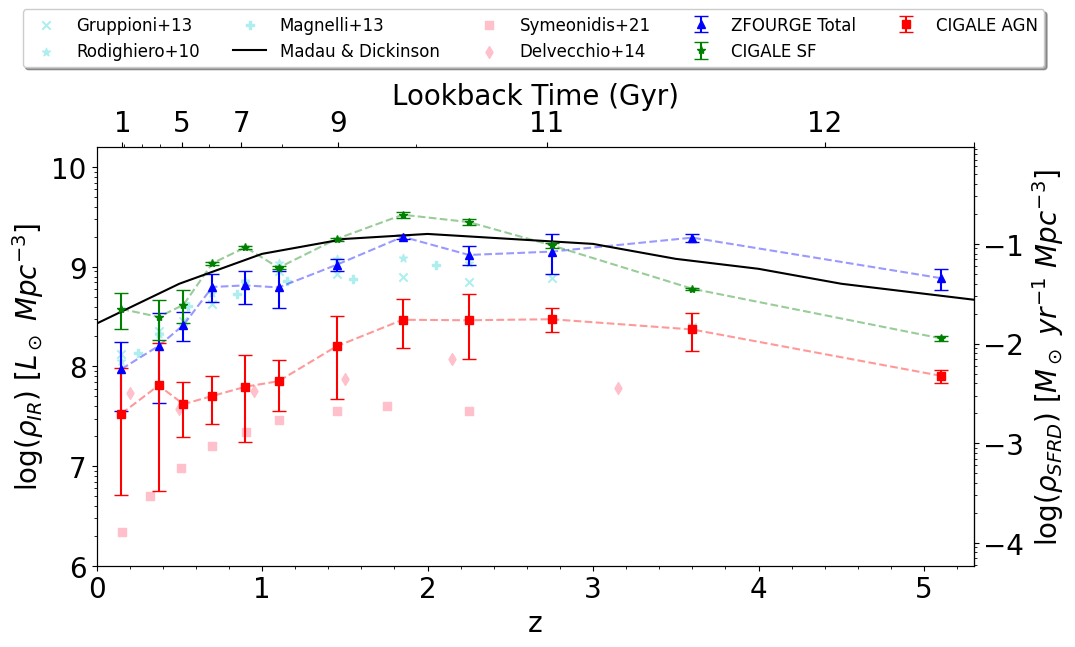

In [8]:
lower_bound = 0
upper_bound = 10**14
redshift_centers = np.mean(ZF_ALL['z'], axis=1)
fig, ax = plt.subplots(figsize=(11, 7))
# fig, ax = plt.subplots(figsize=(12, 6))
print(redshift_centers, '\n')
import matplotlib.ticker as ticker

# lower_bounds = [0,      10**10, 10**12, 10**14, 10**16, 10**18, 10**20, 10**22, 10**24, 10**26, 10**28]
# upper_bounds = [10**10, 10**12, 10**14, 10**16, 10**18, 10**20, 10**22, 10**24, 10**26, 10**28, 10**30]

lower_bounds = np.power(10.0, np.arange(0, 32, 2)).tolist()
lower_bounds[0] = 0
upper_bounds = lower_bounds[1:] + [np.inf]

from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
z = np.mean(ZF_ALL['z'], axis=1).tolist()
age = cosmo.lookback_time(z).value

def kennicutt_sfr(rho_ir):
    return rho_ir / (1.7*10**10)

def inverse_kennicutt_sfr(sfr):
    return sfr * 1.7*10**10

def saunder_area(params, perrors, sigmas):
    results_area = []
    for param, perr, sigma in zip(params, perrors, sigmas):
        param = np.append(param, sigma)
        perr = np.append(perr, 0)
        sub_area, sub_area_up, sub_area_down = 0, 0, 0
        for l, u in zip(lower_bounds, upper_bounds):
            area, _ = integrate.quad(saunders_luminosity, l, u, args=tuple(param)) / np.log(10)
            area_up, _ = integrate.quad(saunders_luminosity, l, u, args=tuple(param+perr)) / np.log(10)
            area_down, _ = integrate.quad(saunders_luminosity, l, u, args=tuple(np.abs(param-perr))) / np.log(10)
            sub_area += area; sub_area_up += area_up; sub_area_down += area_down
        results_area.append([sub_area, np.abs(sub_area_up-sub_area), np.abs(sub_area-sub_area_down)])

    results_area = np.array(results_area)
    area = results_area[:,0]
    area_up = results_area[:,1]
    area_down = results_area[:,2]
    return area, area_up, area_down

def agn_saunder_area(params, perrors, sigmas):
    results_area = []
    for param, perr, sigma in zip(params, perrors, sigmas):
        param = np.append(param, sigma)
        perr = np.append(perr, 0)
        sub_area, sub_area_up, sub_area_down = 0, 0, 0
        for l, u in zip(lower_bounds, upper_bounds):
            area, _ = integrate.quad(agn_saunders_luminosity, l, u, args=tuple(param)) / np.log(10)
            area_up, _ = integrate.quad(agn_saunders_luminosity, l, u, args=tuple(param+perr)) / np.log(10)
            area_down, _ = integrate.quad(agn_saunders_luminosity, l, u, args=tuple(np.abs(param-perr))) / np.log(10)
            sub_area += area; sub_area_up += area_up; sub_area_down += area_down
        results_area.append([sub_area, np.abs(sub_area_up-sub_area), np.abs(sub_area-sub_area_down)])

    results_area = np.array(results_area)
    area = results_area[:,0]
    area_up = results_area[:,1]
    area_down = results_area[:,2]
    return area, area_up, area_down

def schechter_area(params, perrors):
    results_area = []
    for param, perr in zip(params, perrors):
        sub_area, sub_area_up, sub_area_down = 0, 0, 0
        for l, u in zip(lower_bounds, upper_bounds):
            area, _ = integrate.quad(schechter_luminosity, l, u, args=tuple(param)) / np.log(10)
            area_up, _ = integrate.quad(schechter_luminosity, l, u, args=tuple(param+perr)) / np.log(10)
            area_down, _ = integrate.quad(schechter_luminosity, l, u, args=tuple(np.abs(param-perr))) / np.log(10)
            sub_area += area; sub_area_up += area_up; sub_area_down += area_down
        results_area.append([sub_area, np.abs(sub_area_up-sub_area), np.abs(sub_area-sub_area_down)])

    results_area = np.array(results_area)
    area = results_area[:,0]
    area_up = results_area[:,1]
    area_down = results_area[:,2]
    return area, area_up, area_down

""" ZFOURGE QUI """
# params = [[float(f"{x[0]:.6e}"), float(f"{x[1]:.6e}")] for x in ZF_QUI['saunder_p'] if len(x) > 0]
# errors = [[float(f"{x[0]:.6e}"), float(f"{x[1]:.6e}")] for x in ZF_QUI['saunder_e'] if len(x) > 0]
# ZF_QUI_params = np.array(params).astype(float)
# ZF_QUI_perr = np.array(errors).astype(float)
# ZF_QUI_sigmas = ZF_QUI['s'].astype(float)
# area, area_up, area_down = saunder_area(ZF_QUI_params, ZF_QUI_perr, ZF_QUI_sigmas)
# ax.errorbar(redshift_centers[:-1], area, yerr=[np.abs(area_down), area_up], ls='none', capsize=5, marker='o', label='ZFOURGE Qui', color='orange')

""" ZFOURGE Total """
ZF_params = ZF_ALL['saunder_p'].astype(float)
ZF_perr = ZF_ALL['saunder_e'].astype(float)
ZF_sigmas = ZF_ALL['s'].astype(float)
zf_area, area_up, area_down = saunder_area(ZF_params, ZF_perr, ZF_sigmas)
ax.errorbar(redshift_centers, zf_area, yerr=[area_down, area_up], ls='none', capsize=5, marker='^', label='ZFOURGE Total', color='blue')
ax.plot(redshift_centers, zf_area, linestyle='--', color='blue', alpha=0.4)
# print('ZFOURGE TOTAL')
# print(f'area = {np.round(np.log10(zf_area),2)}')
# print(f'up_e = {np.round(area_up / (zf_area* np.log(10)),2)}')
# print(f'dn_e = {np.round(area_down / (zf_area* np.log(10)),2)}', '\n')

""" CIAGLE SF Schechter """
CG_SF_params = CG_SF['schech_p'].astype(float)
CG_SF_perr = CG_SF['schech_e'].astype(float)
area, area_up, area_down = schechter_area(CG_SF_params, CG_SF_perr)
ax.errorbar(redshift_centers, area, yerr=[area_down, area_up], ls='none', capsize=5, marker='*', label='CIGALE SF', color='green')
ax.plot(redshift_centers, area, linestyle='--', color='green', alpha=0.4)
# print('CIGALE SF')
# print(f'area = {np.round(np.log10(area),2)}')
# print(f'up_e = {np.round(area_up / (area* np.log(10)),2)}')
# print(f'dn_e = {np.round(area_down / (area* np.log(10)),2)}', '\n')

""" CIAGLE AGN Saunder """
CG_AGN_params = CG_AGN['saunder_p'].astype(float)
CG_AGN_perr = CG_AGN['saunder_e'].astype(float)
CG_AGN_sigmas = CG_AGN['s'].astype(float)
area, area_up, area_down = agn_saunder_area(CG_AGN_params, CG_AGN_perr, CG_AGN_sigmas)
ax.errorbar(redshift_centers, area, yerr=[area_down, area_up], ls='none', capsize=5, marker='s', label='CIGALE AGN', color='red')
ax.plot(redshift_centers, area, linestyle='--', color='red', alpha=0.4)
# print('CIGALE AGN')
# print(f'area = {np.round(np.log10(area),2)}')
# print(f'up_e = {np.round(area_up / (area* np.log(10)),2)}')
# print(f'dn_e = {np.round(area_down / (area* np.log(10)),2)}', '\n')

""" Gruppioni """
grup_z = [0.15, 0.375, 0.525, 0.7, 0.9, 1.1, 1.45, 1.85, 2.25, 2.75, 3.6]
grup_sfrd = [134927986, 224926598, 282833346, 419226743, 662870316, 904966813, 843374388, 785973970, 702973211, 776794465, 250011038]
ax.scatter(grup_z, grup_sfrd, label='Gruppioni+13', color='paleturquoise', marker='x')

""" Rodighiero """
rod_z = [0.15, 0.375, 0.525, 0.7, 0.9, 1.1, 1.45, 1.85, 2.25]
rod_sfrd = [114504756, 211935255, 412072148, 540281778, 726043374, 1103521372, 1202856733, 1217759418, 1103521372]
ax.scatter(rod_z, rod_sfrd, label='Rodighiero+10', color='paleturquoise', marker='*')

""" Magnelli """
mag_z = [0.25, 0.55, 0.85, 1.15, 1.55, 2.05]
mag_sfrd = [136110369.6312692, 408205320.6201911, 529479771.03657484, 720676873.4806798, 756242512.6761533, 1049350326.7611474]
ax.scatter(mag_z, mag_sfrd, label='Magnelli+13', color='paleturquoise', marker='P')

""" Madau and Dickinson """
md_z = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6]
md_sfr = [-1.8, -1.4, -1.1, -0.95, -0.9, -0.95, -1, -1.15, -1.25, -1.40, -1.50, -1.60, -1.70]
md_sfrd = inverse_kennicutt_sfr(10**np.array(md_sfr))
ax.plot(md_z, md_sfrd, label='Madau & Dickinson', color='black')

""" Symeonidis AGN """
symeo_z = [0.154126213592233, 0.3252427184466019, 0.5072815533980582, 0.7002427184466019, 0.9004854368932038, 1.1007281553398058, 1.453883495145631, 1.7524271844660195, 2.25121359223301]
symeo_sfrd = [6.337719298245614, 6.701754385964913, 6.982456140350877, 7.197368421052632, 7.3464912280701755, 7.464912280701754, 7.548245614035087, 7.605263157894736, 7.552631578947368]
ax.scatter(symeo_z, 10**np.array(symeo_sfrd), label='Symeonidis+21', color='pink', marker='s')

""" Delvecchio AGN """
delv_z = [0.2, 0.5, 0.95, 1.5, 2.15, 3.15]
delv_sfrd = np.array([125451768.02428974, 85809316.13269955, 129877655.65326622, 171212094.7528276, 271352883.4407633, 139166415.35147715]) / np.log(10)
ax.scatter(delv_z, delv_sfrd, label='Delvecchio+14', color='pink', marker='d')

# Luminosity Density
ax.set_ylabel(r'log($\rho_{IR}$) [$L_\odot$ $Mpc^{-3}$]', fontsize=20)
ax.set_yscale('log', nonpositive='clip')
ax.set_xlabel('z', fontsize=20)
ax.set_xticks([0,1,2,3,4,5])
ax.set_ylim(10**6, 10**10.2)
ax.set_xlim(0, 5.3)
ax.tick_params(axis='both', labelsize=20)
ax.yaxis.set_major_formatter(LogFormatterExponent(base=10))

# SFRD Secondary Axis
secax = ax.secondary_yaxis('right', functions=(kennicutt_sfr, inverse_kennicutt_sfr))
secax.set_ylabel(r'log($\rho_{SFRD}$) [$M_\odot$ $yr^{-1}$ $Mpc^{-3}$]', fontsize=20)
secax.yaxis.set_major_formatter(LogFormatterExponent(base=10))
secax.tick_params(labelsize=20)

# Create the second x-axis at the top
ax2 = ax.twiny()
desired_ticks = [13, 12, 11, 9, 7, 5, 1] # Define the desired whole number ticks for the age axis
desired_tick_labels = np.interp(desired_ticks, age, z) # Find the corresponding z values for these ticks by interpolation
ax2.set_xticks(desired_tick_labels) # Set the ticks and labels for the second x-axis
ax2.set_xticklabels([''] + desired_ticks[1:], fontsize=20) # Set the labels for the second x-axis
ax2.set_xlabel('Lookback Time (Gyr)', fontsize=20)

# Minor ticks
desired_minor_ticks = [10, 8, 6, 4, 3, 2]
desired_minor_tick_labels = np.interp(desired_minor_ticks, age, z)
ax2.set_xticks(desired_minor_tick_labels, minor=True) 

ax.legend(bbox_to_anchor=(1.09, 1.35), fontsize=12, ncol=5, shadow=True)
ax.minorticks_on()
plt.tight_layout()
# if export:
plt.savefig('SFRD.png', dpi=600)
plt.show()

# Class Evolution

In [ ]:
# luminosity_classes = np.arange(8, 14.5, 0.5)
# colors = plt.cm.gist_rainbow(np.linspace(0,1,len(luminosity_classes)))
# fig, ax = plt.subplots(2, 1, figsize=(8, 8), sharex=True)
# from matplotlib.ticker import FuncFormatter

# def custom_log_formatter(val, pos):
#     # Convert the logarithmic value to an exponent
#     exponent = int(np.log10(val))
#     return f'${exponent}$'

# class_phi = []
# for lum in luminosity_classes:
#     lum_phi = []
#     for params, perr, sigma in zip(ZF_ALL['saunder_p'], ZF_ALL['saunder_e'], ZF_ALL['s']):
#     # for params, perr in zip(CG_ALL['saunder_p'], CG_ALL['saunder_e']):
#     # for params, perr in zip(CG_SF['saunder_p'], CG_SF['saunder_e']):
#     # for params, perr in zip(CG_AGN['saunder_p'], CG_AGN['saunder_e']):
#         if params[0] is None:
#             lum_phi.append([np.nan, np.nan, np.nan])
#             continue
#         phi = saunders_luminosity(10**lum, *params, sigma)
#         phi_up = saunders_luminosity(10**lum, *(params+perr), sigma)
#         phi_down = saunders_luminosity(10**lum, *(params-perr), sigma)
#         # phi = schechter_luminosity(10**lum, *params)
#         # phi_up = schechter_luminosity(10**lum, *(params+perr))
#         # phi_down = schechter_luminosity(10**lum, *(params-perr))
#         lum_phi.append([phi, phi_up-phi, phi-phi_down])
#     class_phi.append(lum_phi)

# for lum, lclass, c in zip(luminosity_classes, class_phi, colors):
#     class_lum = np.array(lclass)
#     phi = class_lum[:,0]
#     phi_up = class_lum[:,1]
#     phi_down = class_lum[:,2]
#     ax[0].errorbar(redshift_centers, phi, yerr=[phi_down, phi_up], ls='--', capsize=4, marker='*', label=f'{lum}', color=c)
#     ax[1].errorbar(redshift_centers, phi*10**lum, yerr=[phi_down*10**lum, phi_up*10**lum], ls='--', capsize=4, marker='*', label=f'{lum}', color=c)
    
# ax[0].legend(bbox_to_anchor=(1,0.9))
# ax[0].set_yscale('log')
# ax[0].yaxis.set_major_formatter(FuncFormatter(custom_log_formatter))
# ax[0].set_ylabel('log($\phi$) [Mpc$^{-3}$ dex$^{-1}$]', fontsize=20)
# ax[0].tick_params(axis='both', labelsize=20)

# ax[1].tick_params(axis='both', labelsize=20)
# ax[1].set_yscale('log')
# ax[1].yaxis.set_major_formatter(LogFormatterExponent(base=10))
# ax[1].legend(bbox_to_anchor=(1,0.9))
# ax[1].set_ylabel(r'log($\phi) \times 10^{L_\odot}$', fontsize=20, labelpad=30)

# fig.supxlabel('z', fontsize=20)
# plt.tight_layout()
# plt.subplots_adjust(hspace=0)
# # if export:
# #     plt.savefig('class_evo.png', dpi=300)
# plt.show()

## Luminosity-Redshift Distribution

In [ ]:
lir_vs_z_zf = np.load('fits/LIR_vs_z_ZF.npz', allow_pickle=True)
lir_vs_z_cg = np.load('fits/LIR_vs_z_CG_AGN.npz', allow_pickle=True)

fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

colors = plt.cm.gist_rainbow(np.linspace(0,1,len(lir_vs_z_zf['z_bins'])))

# ZFOURGE Total
ax[0].scatter(lir_vs_z_zf['z'], lir_vs_z_zf['lum'], s=1, color='grey', alpha=0.3, marker='x')
ax[0].set_title('ZFOURGE Total', x=0.25, y=0.9, fontsize=20)
for (z_start, z_end), z, lum, c in zip(lir_vs_z_zf['z_bins'], lir_vs_z_zf['z_corr'], lir_vs_z_zf['lum_corr'], colors):
    ax[0].scatter(z, lum, s=1, label=f'{z_start} $\leq$ z < {z_end}', color=c, marker='x')

# CIGALE AGN
ax[1].scatter(lir_vs_z_cg['z'], lir_vs_z_cg['lum'], s=1, color='grey', alpha=0.3, marker='x')
ax[1].set_title('CIGALE AGN', x=0.2, y=0.9, fontsize=20)
for (z_start, z_end), z, lum, c in zip(lir_vs_z_cg['z_bins'], lir_vs_z_cg['z_corr'], lir_vs_z_cg['lum_corr'], colors):
    ax[1].scatter(z, lum, s=1, label=f'{z_start} $\leq$ z < {z_end}', color=c, marker='x')

ax[0].tick_params(axis='both', labelsize=20)
ax[0].set_ylabel('log($L_{IR}$) [$L_\odot$]', fontsize=20)
ax[1].tick_params(axis='both', labelsize=20)
ax[1].legend(bbox_to_anchor=(1,0.9), markerscale=5, fontsize=12)
ax[1].set_ylim(7, 14)
ax[1].set_yticks([8,10,12,14])
ax[0].set_xlim(0, 6)
ax[1].set_xlim(0, 6)
ax[0].set_xticks([0,2,4,6])
ax[1].set_xticks([2,4,6])

fig.supxlabel('z', fontsize=20, x=0.46)
ax[0].minorticks_on()
ax[1].minorticks_on()
plt.tight_layout()
plt.subplots_adjust(wspace=0)
if export:
    plt.savefig('LIR vs Z.png', dpi=300)
plt.show()

In [ ]:
lir_vs_z_zf = np.load('fits/LIR_vs_z_ZF.npz', allow_pickle=True)
lir_vs_z_cg = np.load('fits/LIR_vs_z_CG_AGN.npz', allow_pickle=True)
lir_vs_z_cg_sf = np.load('fits/LIR_vs_z_CG_SF.npz', allow_pickle=True)

ZF_reduced = np.load('ZF_reduced.npz', allow_pickle=True)
CG_AGN_reduced = np.load('CG_AGN_reduced.npz', allow_pickle=True)
CG_SF_reduced = np.load('CG_SF_reduced.npz', allow_pickle=True)

fig, ax = plt.subplots(3, 1, figsize=(7, 15), sharey=True, sharex=True)
colors = plt.cm.gist_rainbow(np.linspace(0,1,len(lir_vs_z_zf['z_bins'])))

# ZFOURGE Total
ax[0].scatter(lir_vs_z_zf['z'], lir_vs_z_zf['lum'], s=1, color='grey', alpha=0.3, marker='x')
ax[0].set_title('ZFOURGE Total', x=0.25, y=0.9, fontsize=20)
for iz, il, c in zip(ZF_reduced['z'], ZF_reduced['lum'], colors):
    ax[0].scatter(iz, il, s=1, color=c, marker='x')

# CIGALE AGN
ax[1].scatter(lir_vs_z_cg['z'], lir_vs_z_cg['lum'], s=1, color='grey', alpha=0.3, marker='x')
ax[1].set_title('CIGALE AGN', x=0.2, y=0.9, fontsize=20)
for iz, il, c in zip(CG_AGN_reduced['z'], CG_AGN_reduced['lum'], colors):
    ax[1].scatter(iz, il, s=1, color=c, marker='x')

# CIGALE SF
ax[2].scatter(lir_vs_z_cg_sf['z'], lir_vs_z_cg_sf['lum'], s=1, color='grey', alpha=0.3, marker='x')
ax[2].set_title('CIGALE SF', x=0.2, y=0.9, fontsize=20)
for iz, il, c, (z_start, z_end) in zip(CG_SF_reduced['z'], CG_SF_reduced['lum'], colors, lir_vs_z_cg_sf['z_bins']):
    ax[2].scatter(iz, il, s=1, color=c, marker='x', label=f'{z_start} $\leq$ z < {z_end}')

for axi in ax.flatten():
    axi.tick_params(axis='both', labelsize=20)
ax[0].set_xlim(0, 6)
ax[0].set_ylim(7, 14)
ax[0].set_xticks([0,1,2,3,4,5,6])
ax[0].set_yticks([8,10,12,14])

fig.supylabel('log($L_{IR}$) [$L_\odot$]', fontsize=20)
fig.supxlabel('z', fontsize=20, x=0.56)
ax[0].minorticks_on()
ax[1].minorticks_on()
ax[2].minorticks_on()
ax[2].legend(markerscale=5, fontsize=12, ncol=2)
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
# if export:
plt.savefig('LIR vs Z.png', dpi=300)
plt.show()

## ZFOURGE Luminosity-Redshift Distribution

In [ ]:
# lir_vs_z_zf = np.load('fits/LIR_vs_z_ZF.npz', allow_pickle=True)
# colors = plt.cm.gist_rainbow(np.linspace(0,1,len(lir_vs_z_zf['z_bins'])))
# plt.figure(figsize=(8, 5))

# plt.scatter(lir_vs_z_zf['z'], lir_vs_z_zf['lum'], s=1, color='grey', alpha=0.3)
# for (z_start, z_end), z, lum, c in zip(lir_vs_z_zf['z_bins'], lir_vs_z_zf['z_corr'], lir_vs_z_zf['lum_corr'], colors):
#     plt.scatter(z, lum, s=1, label=f'{z_start} $\leq$ z < {z_end}', color=c)

# plt.tick_params(axis='both', labelsize=20)
# plt.ylabel('log($L_{IR}$) [$L_\odot$]', fontsize=20)
# plt.xlabel('z', fontsize=20)
# plt.ylim(7, 14)
# plt.xlim(0, 6)
# plt.xticks([0,1,2,3,4,5,6])
# plt.legend(bbox_to_anchor=(1,0.9), markerscale=5, fontsize=12)
# plt.tight_layout()
# plt.subplots_adjust(wspace=0)
# if export:
#     plt.savefig('ZF_LIR_vs_z.png', dpi=300)
# plt.show()

## CIGALE AGN Luminosity-Redshift Distribution

In [ ]:
# lir_vs_z_cg = np.load('fits/LIR_vs_z_CG_AGN.npz', allow_pickle=True)
# colors = plt.cm.gist_rainbow(np.linspace(0,1,len(lir_vs_z_zf['z_bins'])))
# plt.figure(figsize=(8, 5))

# plt.scatter(lir_vs_z_cg['z'], lir_vs_z_cg['lum'], s=1, color='grey', alpha=0.3)
# for (z_start, z_end), z, lum, c in zip(lir_vs_z_cg['z_bins'], lir_vs_z_cg['z_corr'], lir_vs_z_cg['lum_corr'], colors):
#     plt.scatter(z, lum, s=1, label=f'{z_start} $\leq$ z < {z_end}', color=c)

# plt.tick_params(axis='both', labelsize=20)
# plt.ylim(5, 13)
# plt.yticks([6,8,10,12])
# plt.legend(bbox_to_anchor=(1,0.9), markerscale=5, fontsize=12)
# plt.xlim(0, 6)
# plt.ylabel('log($L_{IR}$) [$L_\odot$]', fontsize=20)
# plt.xlabel('z', fontsize=20)
# plt.tight_layout()
# plt.subplots_adjust(wspace=0)
# if export:
#     plt.savefig('CG_LIR_vs_z_AGN.png', dpi=300)
# plt.show()

## ZFOURGE One Plot

In [ ]:
# colors = plt.cm.gist_rainbow(np.linspace(0,1,len(ZF_ALL['z'])))
# plt.figure(figsize=(8, 5))

# for i, (l, p, e, z, c) in enumerate(zip(ZF_ALL['x'], ZF_ALL['y'], ZF_ALL['e'], ZF_ALL['z'], colors)):
#     p_down = np.log10(p - e)
#     p_up = np.log10(p + e)
#     plt.fill_between(l, p_down, p_up, label=f'{z[0]} $\leq$ z < {z[1]}', color=c)

# plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", fontsize=12)
# plt.xlabel('Log($L_{IR}$) [$L_{\odot}$]', y=0.05, fontsize=20)
# plt.ylabel('log($\phi$) [Mpc$^{-3}$ dex$^{-1}$]', x=0.05, fontsize=20)
# plt.xlim(8.5, 13.5)
# plt.ylim(-5.5, -1)
# plt.yticks([-5,-4,-3,-2,-1], fontsize=20)
# plt.xticks(fontsize=20)
# plt.tight_layout()
# if export:
#     plt.savefig('ZF_filled.png', dpi=300)
# plt.show()

## CIGALE One Plot

In [ ]:
# colors = plt.cm.gist_rainbow(np.linspace(0,1,len(ZF_ALL['z'])))
# plt.figure(figsize=(8, 5))

# for i, (l, p, e, z, c) in enumerate(zip(CG_AGN['x'], CG_AGN['y'], CG_AGN['e'], CG_AGN['z'], colors)):
#     p_down = np.log10(p - e)
#     p_up = np.log10(p + e)
#     plt.fill_between(l, p_down, p_up, label=f'{z[0]} $\leq$ z < {z[1]}', color=c)

# plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", fontsize=12)
# plt.xlabel('Log($L_{IR}$) [$L_{\odot}$]', y=0.05, fontsize=20)
# plt.ylabel('log($\phi$) [Mpc$^{-3}$ dex$^{-1}$]', x=0.05, fontsize=20)
# plt.xlim(6.75, 12.25)
# plt.ylim(-5.5, -1)
# plt.yticks([-5,-4,-3,-2,-1], fontsize=20)
# plt.xticks(fontsize=20)
# plt.tight_layout()
# if export:
#     plt.savefig('CG_filled.png', dpi=300)
# plt.show()

## One Plot Combined

In [ ]:
colors = plt.cm.gist_rainbow(np.linspace(0,1,len(ZF_ALL['z'])))
fig, axes = plt.subplots(3, 1, figsize=(7, 15), sharey=True, sharex=True)
# fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True, sharex=True)

# ZFOURGE
for i, (l, p, e, z, c) in enumerate(zip(ZF_ALL['x'], ZF_ALL['y'], ZF_ALL['e'], ZF_ALL['z'], colors)):
    p_down = np.log10(p - e)
    p_up = np.log10(p + e)
    axes[0].fill_between(l, p_down, p_up, label=f'{z[0]} $\leq$ z < {z[1]}', color=c)
    axes[0].set_title('ZFOURGE Total', fontsize=20, x=0.3, y=0.9)

# CG AGN
for i, (l, p, e, z, c) in enumerate(zip(CG_AGN['x'], CG_AGN['y'], CG_AGN['e'], CG_AGN['z'], colors)):
    p_down = np.log10(p - e)
    p_up = np.log10(p + e)
    axes[1].fill_between(l, p_down, p_up, label=f'{z[0]} $\leq$ z < {z[1]}', color=c)
    axes[1].set_title('CIGALE AGN', fontsize=20, x=0.3, y=0.9)

# CG SF
for i, (l, p, e, z, c) in enumerate(zip(CG_SF['x'], CG_SF['y'], CG_SF['e'], CG_SF['z'], colors)):
    p_down = np.log10(p - e)
    p_up = np.log10(p + e)
    axes[2].fill_between(l, p_down, p_up, label=f'{z[0]} $\leq$ z < {z[1]}', color=c)
    axes[2].set_title('CIGALE SF', fontsize=20, x=0.3, y=0.9)

# plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", fontsize=12)
fig.supxlabel('Log($L_{IR}$) [$L_{\odot}$]', fontsize=20, x=0.56)
fig.supylabel('log($\phi$) [Mpc$^{-3}$ dex$^{-1}$]', fontsize=20)
axes[1].set_xlim(8, 13.5)
axes[1].set_ylim(-5.5, -1)
axes[1].set_yticks([-5,-4,-3,-2,-1])
axes[1].set_xticks([8,9,10,11,12,13])
axes[0].tick_params(axis='both', labelsize=20)
axes[1].tick_params(axis='both', labelsize=20)
axes[2].tick_params(axis='both', labelsize=20)
axes[2].legend(loc='lower left', fontsize=12)

axes[0].minorticks_on()
axes[1].minorticks_on()
axes[2].minorticks_on()
# axes[2].legend(fontsize=12, bbox_to_anchor=(1, 1.25), ncols=6, shadow=True)
plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)
# if export:
plt.savefig('LF Filled.png', dpi=300, bbox_inches='tight')
plt.show()

## Class Evolution

In [ ]:
# luminosity_classes = np.arange(10.5, 13.5, 0.5)
# colors = plt.cm.gist_rainbow(np.linspace(0,1,len(luminosity_classes)))
# print(len(colors))
# from matplotlib.ticker import FuncFormatter
# plt.figure(figsize=(7, 5))

# def custom_log_formatter(val, pos):
#     # Convert the logarithmic value to an exponent
#     exponent = int(np.log10(val))
#     return f'${exponent}$'

# class_phi = []
# for lum in luminosity_classes:
#     lum_phi = []
#     for params, perr, sigma in zip(ZF_ALL['saunder_p'], ZF_ALL['saunder_e'], ZF_ALL['s']):
#     # for params, perr in zip(CG_SF['schech_p'], CG_SF['schech_e']):
#     # for params, perr in zip(CG_AGN['schech_p'], CG_AGN['schech_e']):
#         if params[0] is None:
#             lum_phi.append([np.nan, np.nan, np.nan])
#             continue
#         phi = saunders_luminosity(10**lum, *params, sigma)
#         phi_up = saunders_luminosity(10**lum, *(params+perr), sigma)
#         phi_down = saunders_luminosity(10**lum, *(params-perr), sigma)
#         # phi = schechter_luminosity(10**lum, *params)
#         # phi_up = schechter_luminosity(10**lum, *(params+perr))
#         # phi_down = schechter_luminosity(10**lum, *(params-perr))
#         lum_phi.append([phi, phi_up-phi, phi-phi_down])
#     class_phi.append(lum_phi)

# for lum, lclass, c in zip(luminosity_classes, class_phi, colors):
#     class_lum = np.array(lclass)
#     phi = class_lum[:,0]
#     phi_up = class_lum[:,1]
#     phi_down = class_lum[:,2]
#     plt.errorbar(redshift_centers, phi, yerr=[phi_down, phi_up], ls='--', capsize=4, marker='^', label=f'{lum}', color=c)
    

# R_Z_10_5 = [0.15, 0.375, 0.525, 0.7, 0.9]
# R_Z_11_0 = [0.15, 0.375, 0.525, 0.7, 0.9, 1.1, 1.45]
# R_Z_11_5 = [0.15, 0.375, 0.525, 0.7, 0.9, 1.1, 1.45, 1.85]
# R_Z_12_0 = [0.15, 0.375, 0.525, 0.7, 0.9, 1.1, 1.45, 1.85, 2.25]
# R_Z_12_5 = [0.15, 0.375, 0.525, 0.7, 0.9, 1.1, 1.45, 1.85, 2.25]
# R_Z_13_0 = [0.15, 0.375, 0.525, 0.7, 0.9, 1.1, 1.45, 1.85, 2.25]
# R_Z = [R_Z_10_5, R_Z_11_0, R_Z_11_5, R_Z_12_0, R_Z_12_5, R_Z_13_0]

# R_PC_10_5 = [-2.68, -2.41, -2.16, -2.04, -1.97]
# R_PC_11_0 = [-3.39, -3.05, -2.73, -2.56, -2.40, -2.29, -2.47]
# R_PC_11_5 = [-4.29, -3.87, -3.52, -3.297, -3.05, -2.82, -2.68, -2.67]
# R_PC_12_0 = [-5.45, -4.97, -4.50, -4.25, -3.96, -3.69, -3.20, -3.20, -3.23]
# R_PC_12_5 = [-6.81, -6.23, -5.71, -5.45, -5.05, -4.75, -4.038, -3.94, -4.13]
# R_PC_13_0 = [-8.38, -7.75, -7.17, -6.85, -6.38, -6.09, -5.26, -5.06, -5.43]
# R_PC = [R_PC_10_5, R_PC_11_0, R_PC_11_5, R_PC_12_0, R_PC_12_5, R_PC_13_0]

# for z, pc, c in zip(R_Z, R_PC, colors):
#     plt.plot(z, 10**np.array(pc), color=c, marker='x', alpha=0.5, linestyle='dotted')
    

# """ Gruppioni """
# def grup_1st_saunders_luminosity(L, alpha, sigma, L_star, phi_star):
#     return phi_star * (L / L_star) ** (1-alpha) * np.exp(-1 / (2 * sigma ** 2) * (np.log10(1 + (L / L_star)))**2)
# grupz = [0.15, 0.375, 0.525, 0.7, 0.9, 1.1, 1.45, 1.85, 2.25, 2.75, 3.6]
# alpha = [1.15, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2]
# sigma = [0.52, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
# lstar = [10.12, 10.41, 10.55, 10.71, 10.97, 11.13, 11.37, 11.50, 11.60, 11.92, 11.90]
# pstar = [-2.29, -2.31, -2.35, -2.35, -2.40, -2.43, -2.70, -3.00, -3.01, -3.27, -3.74]
# class_phi = []
# for lum in luminosity_classes:
#     lum_phi = []
#     for a, s, l, p in zip(alpha, sigma, lstar, pstar):
#         phi = grup_1st_saunders_luminosity(10**lum, a, s, 10**l, 10**p)
#         lum_phi.append(phi)
#     class_phi.append(lum_phi)
# for lclass, c in zip(class_phi, colors):
#     plt.plot(grupz, lclass, marker='*', color=c, alpha=0.5, linestyle='-.')

# plt.text(2.5, 10**-7, '\u25b2 = ZF Total', color='black', fontsize=12)
# plt.text(2.5, 10**-7.5, '\u00d7 = Rodighiero+10', color='black', fontsize=12)
# plt.text(2.5, 10**-8, '\u2605 = Gruppioni+13', color='black', fontsize=12)

# plt.legend(title='log($L_\odot$)')
# plt.yscale('log')
# plt.gca().yaxis.set_major_formatter(FuncFormatter(custom_log_formatter))
# plt.ylabel('log($\phi$) [Mpc$^{-3}$ dex$^{-1}$]', fontsize=20)
# plt.xlabel('z', fontsize=20)
# plt.xticks([0,1,2,3,4,5])
# plt.tick_params(axis='both', labelsize=20)
# plt.tight_layout()
# plt.subplots_adjust(hspace=0)
# plt.ylim(10**-10, 10**-1)
# # if export:
# #     plt.savefig('Class Evo ZF.png', dpi=300)
# plt.show()

## Combined Class Evolution

In [ ]:
# from matplotlib.ticker import FuncFormatter
# luminosity_classes = np.arange(8, 13.5, 0.5)
# colors = plt.cm.gist_rainbow(np.linspace(0,1,len(luminosity_classes)))
# redshift_centers = np.mean(ZF_ALL['z'], axis=1)

# def schechter_luminosity(L, L_star, phi_star):
#     return phi_star * (L / L_star) ** (1-1.2) * np.exp(-L / L_star)

# def saunders_luminosity(L, L_star, phi_star, sigma):
#     return phi_star * (L / L_star) ** (1-1.3) * np.exp(-1 / (2 * sigma ** 2) * (np.log10(1 + (L / L_star)))**2)

# def custom_log_formatter(val, pos):
#     """ Convert the logarithmic value to an exponent """
#     exponent = int(np.log10(val))
#     return f'${exponent}$'

# def class_schechter_phi(file, luminosity_classes):
#     class_phi = []
#     for lum in luminosity_classes:
#         lum_phi = []
#         for params, perr in zip(file['schech_p'], file['schech_e']):
#             if len(params) == 0:
#                 lum_phi.append([np.nan, np.nan, np.nan])
#                 continue
#             phi = schechter_luminosity(10**lum, *params)
#             phi_up = schechter_luminosity(10**lum, *(params+perr))
#             phi_down = schechter_luminosity(10**lum, *(np.abs(params-perr)))
#             lum_phi.append([phi, np.abs(phi_up-phi), np.abs(phi-phi_down)])
#         class_phi.append(lum_phi)
#     return class_phi

# def class_saunder_phi(file, luminosity_classes):
#     class_phi = []
#     for lum in luminosity_classes:
#         lum_phi = []
#         for params, perr, sigma in zip(file['saunder_p'], file['saunder_e'], file['s']):
#             if len(params) == 0:
#                 lum_phi.append([np.nan, np.nan, np.nan])
#                 continue
#             phi = saunders_luminosity(10**lum, *params, sigma)
#             phi_up = saunders_luminosity(10**lum, *(params+perr), sigma)
#             phi_down = saunders_luminosity(10**lum, *(np.abs(params-perr)), sigma)
#             lum_phi.append([phi, np.abs(phi_up-phi), np.abs(phi-phi_down)])
#         class_phi.append(lum_phi)
#     return class_phi

# def class_agn_saunder_phi(file, luminosity_classes):
#     class_phi = []
#     for lum in luminosity_classes:
#         lum_phi = []
#         for params, perr, sigma in zip(file['saunder_p'], file['saunder_e'], file['s']):
#             if len(params) == 0:
#                 lum_phi.append([np.nan, np.nan, np.nan])
#                 continue
#             phi = agn_saunders_luminosity(10**lum, *params, sigma)
#             phi_up = agn_saunders_luminosity(10**lum, *(params+perr), sigma)
#             phi_down = agn_saunders_luminosity(10**lum, *(np.abs(params-perr)), sigma)
#             lum_phi.append([phi, np.abs(phi_up-phi), np.abs(phi-phi_down)])
#         class_phi.append(lum_phi)
#     return class_phi

# def plot_class_evo(ax, luminosity_classes, class_phi, colors):
#     for lum, lclass, c in zip(luminosity_classes, class_phi, colors):
#         class_lum = np.array(lclass)
#         phi = class_lum[:,0]
#         phi_up = class_lum[:,1]
#         phi_down = class_lum[:,2]
#         ax.errorbar(redshift_centers, phi, yerr=[phi_down, phi_up], ls='--', capsize=4, marker='*', label=f'{lum}', color=c)
#         ax.tick_params(axis='both', labelsize=20)

# fig, ax = plt.subplots(2, 3, figsize=(14, 10), sharex=True, sharey=True)
# ax = ax.flatten()

# # ZFOURGE
# class_evo_ZF_all = class_saunder_phi(ZF_ALL, luminosity_classes)
# class_evo_ZF_SF = class_saunder_phi(ZF_SF, luminosity_classes)
# class_evo_ZF_QUI = class_saunder_phi(ZF_QUI, luminosity_classes)
# plot_class_evo(ax[0], luminosity_classes, class_evo_ZF_all, colors)
# plot_class_evo(ax[1], luminosity_classes, class_evo_ZF_SF, colors)
# plot_class_evo(ax[2], luminosity_classes, class_evo_ZF_QUI, colors)

# # CIGALE
# class_evo_CG_all = class_schechter_phi(CG_ALL, luminosity_classes)
# class_evo_CG_SF = class_schechter_phi(CG_SF, luminosity_classes)
# class_evo_CG_AGN = class_agn_saunder_phi(CG_AGN, luminosity_classes)
# plot_class_evo(ax[3], luminosity_classes, class_evo_CG_all, colors)
# plot_class_evo(ax[4], luminosity_classes, class_evo_CG_SF, colors)
# plot_class_evo(ax[5], luminosity_classes, class_evo_CG_AGN, colors)

# """ Gruppioni """
# def grup_1st_saunders_luminosity(L, alpha, sigma, L_star, phi_star):
#     return phi_star * (L / L_star) ** (1-alpha) * np.exp(-1 / (2 * sigma ** 2) * (np.log10(1 + (L / L_star)))**2)
# grupz = [0.15, 0.375, 0.525, 0.7, 0.9, 1.1, 1.45, 1.85, 2.25, 2.75, 3.6]
# alpha = [1.15, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2]
# sigma = [0.52, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
# lstar = [10.12, 10.41, 10.55, 10.71, 10.97, 11.13, 11.37, 11.50, 11.60, 11.92, 11.90]
# pstar = [-2.29, -2.31, -2.35, -2.35, -2.40, -2.43, -2.70, -3.00, -3.01, -3.27, -3.74]
# class_phi = []
# for lum in luminosity_classes:
#     lum_phi = []
#     for a, s, l, p in zip(alpha, sigma, lstar, pstar):
#         phi = grup_1st_saunders_luminosity(10**lum, a, s, 10**l, 10**p)
#         lum_phi.append(phi)
#     class_phi.append(lum_phi)
    
# for lclass, c in zip(class_phi, colors):
#     ax[0].plot(grupz, lclass, marker='*', color=c, alpha=0.5, linestyle='-.')
    



# ax[0].text(2.5, 10**-7, '\u25b2 = ZF Total', color='black', fontsize=12)
# ax[0].text(2.5, 10**-7.5, '\u00d7 = Rodighiero+10', color='black', fontsize=12)
# ax[0].text(2.5, 10**-8, '\u2605 = Gruppioni+13', color='black', fontsize=12)

# """ Rodighiero """
# R_Z_10_5 = [0.15, 0.375, 0.525, 0.7, 0.9]
# R_Z_11_0 = [0.15, 0.375, 0.525, 0.7, 0.9, 1.1, 1.45]
# R_Z_11_5 = [0.15, 0.375, 0.525, 0.7, 0.9, 1.1, 1.45, 1.85]
# R_Z_12_0 = [0.15, 0.375, 0.525, 0.7, 0.9, 1.1, 1.45, 1.85, 2.25]
# R_Z_12_5 = [0.15, 0.375, 0.525, 0.7, 0.9, 1.1, 1.45, 1.85, 2.25]
# R_Z_13_0 = [0.15, 0.375, 0.525, 0.7, 0.9, 1.1, 1.45, 1.85, 2.25]
# R_Z = [R_Z_10_5, R_Z_11_0, R_Z_11_5, R_Z_12_0, R_Z_12_5, R_Z_13_0]
# R_PC_10_5 = [-2.68, -2.41, -2.16, -2.04, -1.97]
# R_PC_11_0 = [-3.39, -3.05, -2.73, -2.56, -2.40, -2.29, -2.47]
# R_PC_11_5 = [-4.29, -3.87, -3.52, -3.297, -3.05, -2.82, -2.68, -2.67]
# R_PC_12_0 = [-5.45, -4.97, -4.50, -4.25, -3.96, -3.69, -3.20, -3.20, -3.23]
# R_PC_12_5 = [-6.81, -6.23, -5.71, -5.45, -5.05, -4.75, -4.038, -3.94, -4.13]
# R_PC_13_0 = [-8.38, -7.75, -7.17, -6.85, -6.38, -6.09, -5.26, -5.06, -5.43]
# R_PC = [R_PC_10_5, R_PC_11_0, R_PC_11_5, R_PC_12_0, R_PC_12_5, R_PC_13_0]
# for z, pc, c in zip(R_Z, R_PC, plt.cm.gist_rainbow(np.linspace(0,1,6))):
#     ax[0].plot(z, 10**np.array(pc), color=c, marker='x', alpha=0.5, linestyle='dotted')


# titles = ['ZF Total', 'ZF SF', 'ZF QUI', 'CG Total', 'CG SF', 'CG AGN']
# for axes, title in zip(ax, titles):
#     axes.set_title(title, y=0.1, x=0.7, fontsize=20)
# ax[0].set_ylim(10**-10, 10**-1)
# ax[0].set_yscale('log')
# ax[0].yaxis.set_major_formatter(FuncFormatter(custom_log_formatter))
# ax[0].legend(title='log($L_\odot$)', fontsize=12, bbox_to_anchor=(3.35, 0.5))
# fig.supylabel('log($\phi$) [Mpc$^{-3}$ dex$^{-1}$]', fontsize=20)
# fig.supxlabel('z', fontsize=20, x=0.515)
# plt.subplots_adjust(wspace=0, hspace=0)
# plt.tight_layout()
# if export:
#     plt.savefig('Class Evo.png', dpi=300, bbox_inches="tight")
# plt.show()

C:\Users\danie\AppData\Local\Temp\ipykernel_15320\1178258374.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


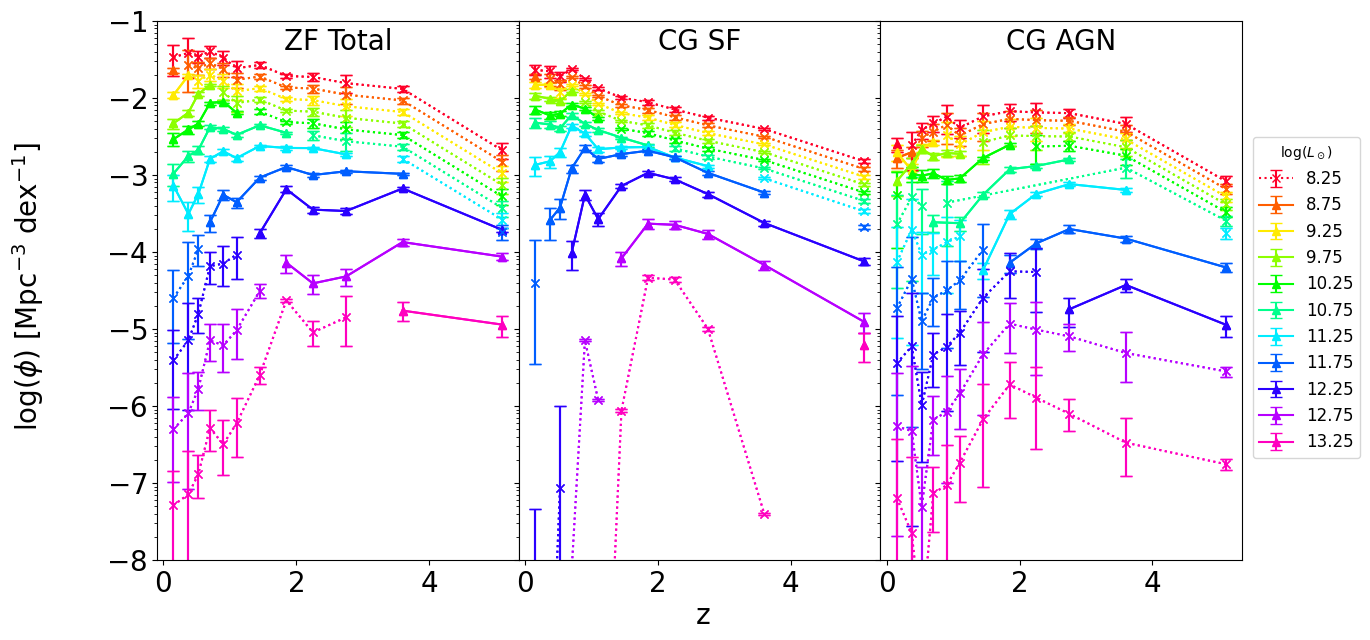

In [10]:
from matplotlib.ticker import FuncFormatter
import matplotlib.lines as mlines
luminosity_classes = np.arange(8.25, 13.5, 0.5)
# luminosity_classes2 = np.arange(8.125, 13.625, 0.5) # luminosity bin edges
# print(len(luminosity_classes), len(luminosity_classes2))
# print(luminosity_classes)
# print()
colors = plt.cm.gist_rainbow(np.linspace(0,1,len(luminosity_classes)))
# colors2 = plt.cm.turbo(np.linspace(0,1,len(luminosity_classes2)))
redshift_centers = np.mean(ZF_ALL['z'], axis=1)

def schechter_luminosity(L, L_star, phi_star):
    return phi_star * (L / L_star) ** (1-1.2) * np.exp(-L / L_star)

def saunders_luminosity(L, L_star, phi_star, sigma):
    return phi_star * (L / L_star) ** (1-1.3) * np.exp(-1 / (2 * sigma ** 2) * (np.log10(1 + (L / L_star)))**2)

def custom_log_formatter(val, pos):
    """ Convert the logarithmic value to an exponent """
    exponent = int(np.log10(val))
    return f'${exponent}$'

    
fig, ax = plt.subplots(1, 3, figsize=(14, 7), sharex=True, sharey=True)
ax = ax.flatten()

def class_phi(file, luminosity_classes, est_func, est_file):
    all_class_phi = []
    all_left = []
    all_right = []
    for lum in luminosity_classes:
        lum_phi = []
        left = []
        right = []
        for i, (f_l, f_p, f_e, (z1, z2)) in enumerate(zip(file['x'], file['y'], file['e'], file['z'])):
            if lum in f_l:
                lum_phi.append((lum, f_p[f_l.index(lum)], np.mean([z1, z2]), f_e[f_l.index(lum)], f_e[f_l.index(lum)]))
            
            # Estimate
            else:
                if len(file['saunder_p'][i]) == 0:
                    continue
                
                # continue
                
                if est_func == 'schechter':
                    est_p = schechter_luminosity(10**lum, *est_file['schech_p'][i])
                    est_up = schechter_luminosity(10**lum, *(est_file['schech_p'][i]+est_file['schech_e'][i]))
                    est_down = schechter_luminosity(10**lum, *np.abs(est_file['schech_p'][i]-est_file['schech_e'][i]))
                elif est_func == 'saunders':
                    est_p = saunders_luminosity(10**lum, *est_file['saunder_p'][i], est_file['s'][i])
                    est_up = saunders_luminosity(10**lum, *(est_file['saunder_p'][i]+est_file['saunder_e'][i]), est_file['s'][i])
                    est_down = saunders_luminosity(10**lum, *np.abs(est_file['saunder_p'][i]-est_file['saunder_e'][i]), est_file['s'][i])
                elif est_func == 'agn_saunders':
                    est_p = agn_saunders_luminosity(10**lum, *est_file['saunder_p'][i], est_file['s'][i])
                    est_up = agn_saunders_luminosity(10**lum, *(est_file['saunder_p'][i]+est_file['saunder_e'][i]), est_file['s'][i])
                    est_down = agn_saunders_luminosity(10**lum, *np.abs(est_file['saunder_p'][i]-est_file['saunder_e'][i]), est_file['s'][i])
                
                if len(lum_phi) == 0:
                    left.append((lum, est_p, np.mean([z1, z2]), est_up-est_p, est_p-est_down))
                elif lum >= lum_phi[-1][0]:
                    right.append((lum, est_p, np.mean([z1, z2]), est_up-est_p, est_p-est_down))
                else:
                    left.append((lum, est_p, np.mean([z1, z2]), est_up-est_p, est_p-est_down))
                    
        all_class_phi.append(lum_phi)
        all_left.append(left)
        all_right.append(right)
    return all_class_phi, all_left, all_right

def plot_class_phi(ax, class_phis, colors):
    for i, (clas, ls, mker) in enumerate(zip(class_phis, ['-', 'dotted', 'dotted'], ['^', 'x', 'x'])):
        for classes, c in zip(clas, colors):
            if len(classes) == 0:
                continue
            x = np.array(classes)[:,0]
            y = np.array(classes)[:,1]
            z = np.array(classes)[:,2]
            e_up = np.array(classes)[:,3]
            e_down = np.array(classes)[:,4]
            ax.errorbar(z, y, yerr=[np.abs(e_down), np.abs(e_up)], ls=ls, capsize=4, marker=mker, color=c, label=f'{x[0]}' if x[0] == 8.25 else "")
            ax.errorbar(z, y, yerr=[np.abs(e_down), np.abs(e_up)], ls=ls, capsize=4, marker=mker, color=c, label=f'{x[0]}' if i == 0 else "")
                
            # pk = np.argmax(y)
            # ax.scatter(z[pk], y[pk], color='black', marker='x', zorder=3)         
            
TEST_ZF_ALL = np.load('fits/WIDE_ZFOURGE_ALL.npz', allow_pickle=True)
TEST_CG_SF = np.load('fits/WIDE_CIGALE_SF.npz', allow_pickle=True)
TEST_CG_AGN = np.load('fits/WIDE_CIGALE_AGN.npz', allow_pickle=True)

ZF_TOTAL_phi = class_phi(TEST_ZF_ALL, luminosity_classes, 'saunders', ZF_ALL)
CG_SF_phi = class_phi(TEST_CG_SF, luminosity_classes, 'schechter', CG_SF)
CG_AGN_phi = class_phi(TEST_CG_AGN, luminosity_classes, 'agn_saunders', CG_AGN)
plot_class_phi(ax[0], ZF_TOTAL_phi, colors)
plot_class_phi(ax[1], CG_SF_phi, colors)
plot_class_phi(ax[2], CG_AGN_phi, colors)

# ZF_TOTAL_phi = class_phi(ZF_ALL, luminosity_classes2, 'saunders', ZF_ALL)
# CG_SF_phi = class_phi(CG_SF, luminosity_classes2, 'schechter', CG_SF)
# CG_AGN_phi = class_phi(CG_AGN, luminosity_classes2, 'agn_saunders', CG_AGN)
# plot_class_phi(ax[0], ZF_TOTAL_phi, colors2)
# plot_class_phi(ax[1], CG_SF_phi, colors2)
# plot_class_phi(ax[2], CG_AGN_phi, colors2)

titles = ['ZF Total', 'CG SF', 'CG AGN']
for axes, title in zip(ax, titles):
    axes.set_title(title, y=0.93, x=0.5, fontsize=20)
    axes.tick_params(axis='both', labelsize=20)
ax[0].set_ylim(10**-8, 10**-1)
ax[0].set_yscale('log')
ax[0].yaxis.set_major_formatter(FuncFormatter(custom_log_formatter))

current_handles, _ = ax[0].get_legend_handles_labels()
ax[0].legend(handles=[current_handles[-1]] + current_handles[:-1], title='log($L_\odot$)', fontsize=12, bbox_to_anchor=(3.35, 0.8))
fig.supylabel('log($\phi$) [Mpc$^{-3}$ dex$^{-1}$]', fontsize=20)
fig.supxlabel('z', fontsize=20, x=0.515)
plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()
# if export:
plt.savefig('Class Evo.png', dpi=600, bbox_inches="tight")
plt.show()

## ZFOURGE Class Evolution

In [ ]:
# fig, ax = plt.subplots(3, 1, figsize=(7, 11), sharex=True, sharey=True)
# ax = ax.flatten()
# luminosity_classes = np.arange(8, 13.5, 0.5)
# redshift_centers = np.mean(ZF_ALL['z'], axis=1)

# def custom_log_formatter(val, pos):
#     """ Convert the logarithmic value to an exponent """
#     exponent = int(np.log10(val))
#     return f'${exponent}$'

# def class_saunder_phi(file, luminosity_classes):
#     class_phi = []
#     for lum in luminosity_classes:
#         lum_phi = []
#         for params, perr, sigma in zip(file['saunder_p'], file['saunder_e'], file['s']):
#             if len(params) == 0:
#                 lum_phi.append([np.nan, np.nan, np.nan])
#                 continue
#             phi = saunders_luminosity(10**lum, *params, sigma)
#             phi_up = saunders_luminosity(10**lum, *(params+perr), sigma)
#             phi_down = saunders_luminosity(10**lum, *(np.abs(params-perr)), sigma)
#             lum_phi.append([phi, np.abs(phi_up-phi), np.abs(phi-phi_down)])
#         class_phi.append(lum_phi)
#     return class_phi

# def plot_class_evo(ax, luminosity_classes, class_phi, colors):
#     for lum, lclass, c in zip(luminosity_classes, class_phi, colors):
#         class_lum = np.array(lclass)
#         phi = class_lum[:,0]
#         phi_up = class_lum[:,1]
#         phi_down = class_lum[:,2]
#         ax.errorbar(redshift_centers, phi, yerr=[phi_down, phi_up], ls='--', capsize=4, marker='*', label=f'{lum}', color=c)
#         ax.tick_params(axis='both', labelsize=20)

# class_evo_ZF_all = class_saunder_phi(ZF_ALL, luminosity_classes)
# class_evo_ZF_SF = class_saunder_phi(ZF_SF, luminosity_classes)
# class_evo_ZF_QUI = class_saunder_phi(ZF_QUI, luminosity_classes)
# plot_class_evo(ax[0], luminosity_classes, class_evo_ZF_all, colors)
# plot_class_evo(ax[1], luminosity_classes, class_evo_ZF_SF, colors)
# plot_class_evo(ax[2], luminosity_classes, class_evo_ZF_QUI, colors)

# for axes, title in zip(ax, ['ZF Total', 'ZF SF', 'ZF QUI']):
#     axes.set_title(title, y=0.2, x=0.6, fontsize=20)
# fig.supylabel('log($\phi$) [Mpc$^{-3}$ dex$^{-1}$]', fontsize=20)
# fig.supxlabel('z', fontsize=20, x=0.56)
# plt.yscale('log')
# ax[0].yaxis.set_major_formatter(FuncFormatter(custom_log_formatter))
# ax[2].legend()
# plt.yticks([10**-8, 10**-6, 10**-4, 10**-2])
# plt.ylim(10**-9, 10**-1)
# plt.tight_layout()
# plt.subplots_adjust(hspace=0)
# if export:
#     plt.savefig('ZF_class_evo.png', dpi=300)

## CIGALE Class Evolution

In [ ]:
# fig, ax = plt.subplots(3, 1, figsize=(7, 11), sharex=True, sharey=False)
# ax = ax.flatten()

# class_evo_CG_all = class_saunder_phi(CG_ALL, luminosity_classes)
# class_evo_CG_SF = class_saunder_phi(CG_SF, luminosity_classes)
# class_evo_CG_AGN = class_saunder_phi(CG_AGN, luminosity_classes)
# plot_class_evo(ax[0], luminosity_classes, class_evo_CG_all, colors)
# plot_class_evo(ax[1], luminosity_classes, class_evo_CG_SF, colors)
# plot_class_evo(ax[2], luminosity_classes, class_evo_CG_AGN, colors)

# for axes, title in zip(ax, ['CG Total', 'CG SF', 'CG AGN']):
#     axes.set_title(title, y=0.2, x=0.6, fontsize=20)
# fig.supylabel('log($\phi$) [Mpc$^{-3}$ dex$^{-1}$]', fontsize=20)
# fig.supxlabel('z', fontsize=20, x=0.56)
# for axes in ax:
#     axes.set_yscale('log')
#     axes.yaxis.set_major_formatter(FuncFormatter(custom_log_formatter))
# # ax[2].legend()
# ax[0].set_yticks([10**-6, 10**-4, 10**-2])
# ax[0].set_ylim(10**-6.5, 10**-1)
# ax[2].set_yticks([10**-10, 10**-8, 10**-6, 10**-4, 10**-2])
# ax[2].set_ylim(10**-10, 10**-1)
# plt.tight_layout()
# plt.subplots_adjust(hspace=0)
# if export:
#     plt.savefig('CG_class_evo.png', dpi=300)